## About The Data

The data we'll be using comes from [kaggle](https://www.kaggle.com/), and contains the following car attributes:

- car_ID
- symboling
- CarName
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- enginetype
- cylindernumber
- enginesize
- fuelsystem
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg
- price


## Problem Statement
You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the followi

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a carng:

## Part 1. Reading and Understanding the Data

Begin by importing some necessary libraries that you'll be using to explore the data.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

In [4]:
# Loading the dataset
cars_df = pd.read_csv('car_data.csv')

# Displaying the first 5 rows
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Print some basic statistics of your data.

In [4]:
# Gerneral stats
general_info = cars_df.describe()
general_info.head(n=100)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Print some general information about your data using pandas.

In [6]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

Based on the output of the describe() method, there are no missing values in the dataset as all columns show 205 non-null entries. 

## Part 2. Data Cleaning and Preparation


Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

In [7]:
# Extract company names and create a new column
cars_df['car_company'] = cars_df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The The unique companies in our dataset are:')
print(cars_df['car_company'].unique())

The The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again. 

In [8]:
# Replace misspelled company names
cars_df['car_company'] = cars_df['car_company'].replace({
                        "toyouta" : "toyota", 
                        "porcshce" : "porsche", 
                        "maxda" : "mazda", 
                        "vokswagen" : "volkswagen",
                        "vw" : "volkswagen"})

# Transform company names to lowercase and take the first word
cars_df['car_company'] = cars_df['car_company'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The unique companies in our dataset are:')
print(cars_df['car_company'].unique())


The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3. Visualising Categorical Data

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel


Create the following plots

1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

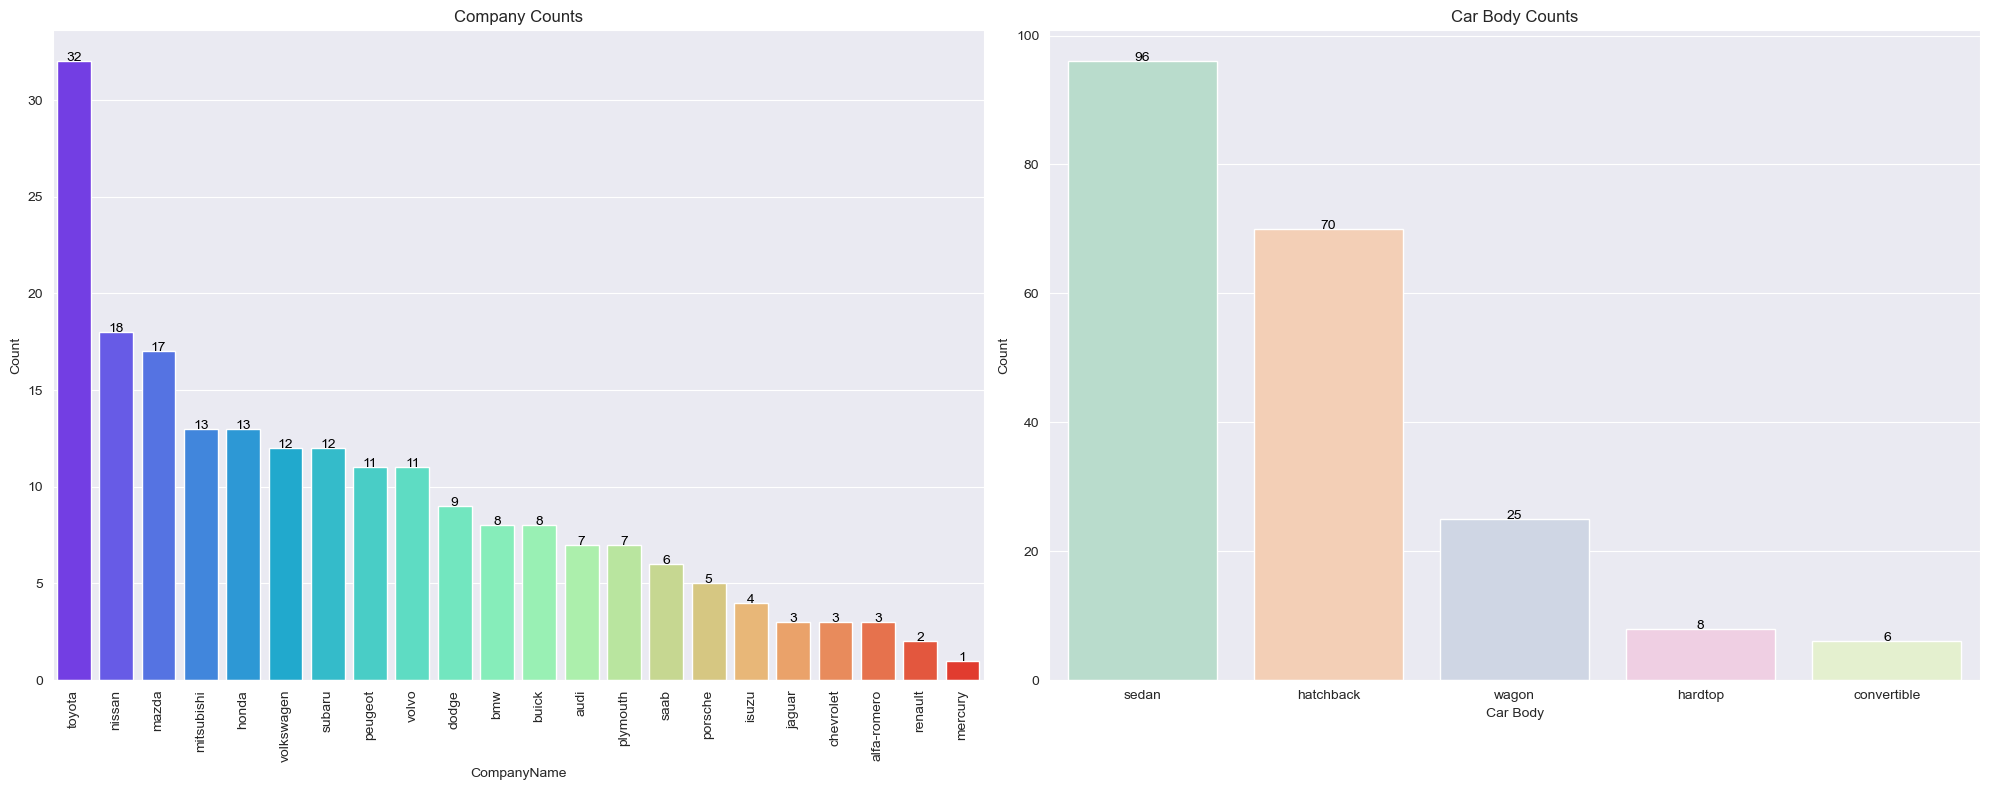

In [9]:
# Creating subplots

# plot 1 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the unique company names on the x-axis, and the value counts on the y-axis
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[0], x=company_counts.index, y=company_counts.values, palette='rainbow')

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90) # for each car company name 




# plot 2 
# Plotting the unique car bodys on the x-axis and value counts on the y-axis
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=car_body_counts.index, y=car_body_counts.values, palette='Pastel2')

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    axes[1].text(i, count, str(count), color='black', ha="center")

axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Count')
axes[1].set_title('Car Body Counts')
axes[1].tick_params(axis='x', rotation= False) # for the name for each body type

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

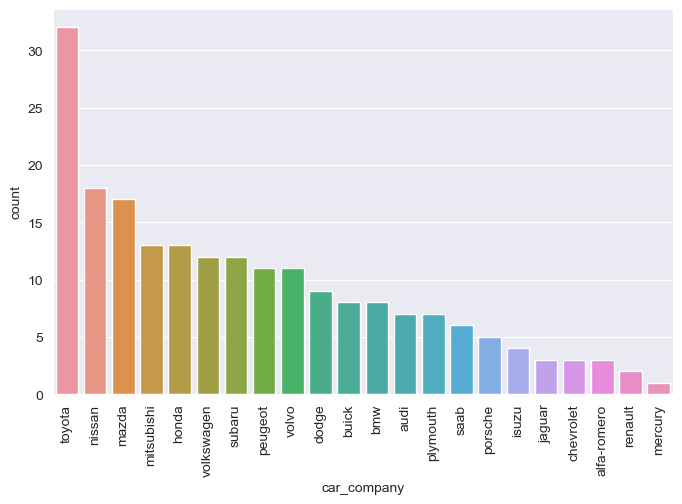

In [8]:
sns.countplot(x = cars_df['car_company'], data = cars_df, order = cars_df['car_company'].value_counts().index)
plt.xticks(rotation = 90)
plt.show

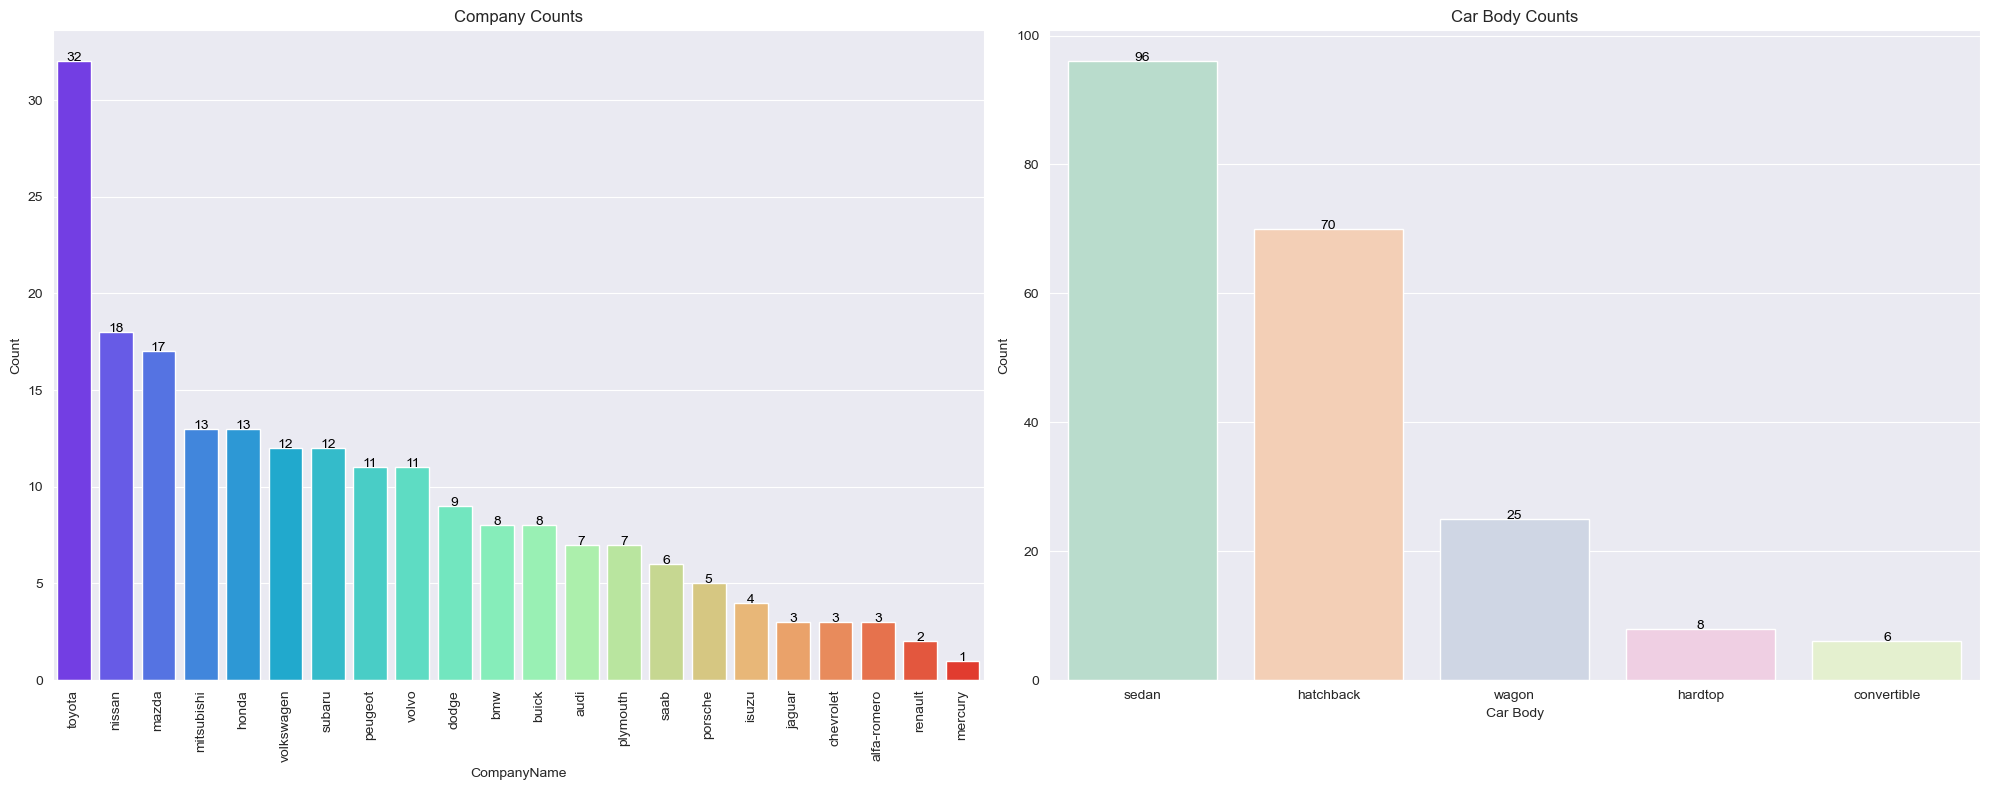

In [15]:
# Creating subplots

# plot 1 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the unique company names on the x-axis, and the value counts on the y-axis
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[0], x=company_counts.index, y=company_counts.values, palette='rainbow')

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90) # for each car company name 




# plot 2 
# Plotting the unique car bodys on the x-axis and value counts on the y-axis
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=car_body_counts.index, y=car_body_counts.values, palette='Pastel2')

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    axes[1].text(i, count, str(count), color='black', ha="center")

axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Count')
axes[1].set_title('Car Body Counts')
axes[1].tick_params(axis='x', rotation= False) # for the name for each body type

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

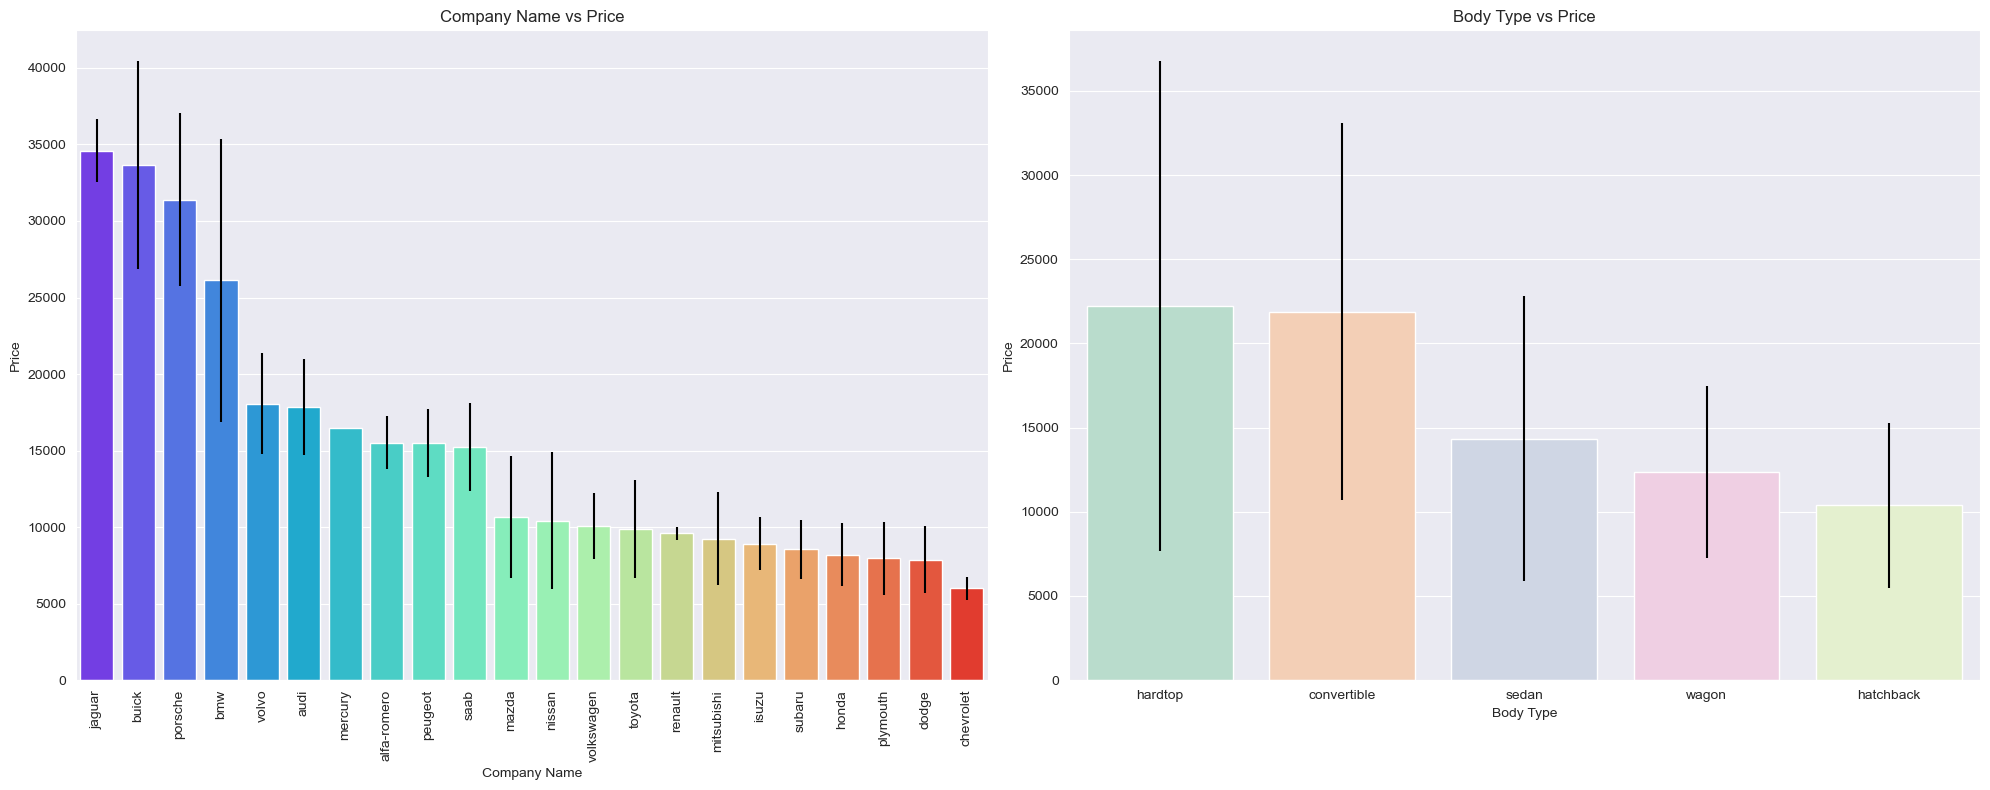

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean price and standard deviation for each company name
company_price_stats = cars_df.groupby('car_company')['price'].agg(['mean', 'std'])
company_price_stats = company_price_stats.sort_values(by='mean', ascending=False)

# Calculate mean price and standard deviation for each car body type
body_price_stats = cars_df.groupby('carbody')['price'].agg(['mean', 'std'])
body_price_stats = body_price_stats.sort_values(by='mean', ascending=False)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Company Name vs Price
sns.barplot(ax=axes[0], x=company_price_stats.index, y=company_price_stats['mean'], 
            palette='rainbow', yerr=company_price_stats['std'])
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Price')
axes[0].set_title('Company Name vs Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Body Type vs Price
sns.barplot(ax=axes[1], x=body_price_stats.index, y=body_price_stats['mean'], 
            palette='Pastel2', yerr=body_price_stats['std'])
axes[1].set_xlabel('Body Type')
axes[1].set_ylabel('Price')
axes[1].set_title('Body Type vs Price')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

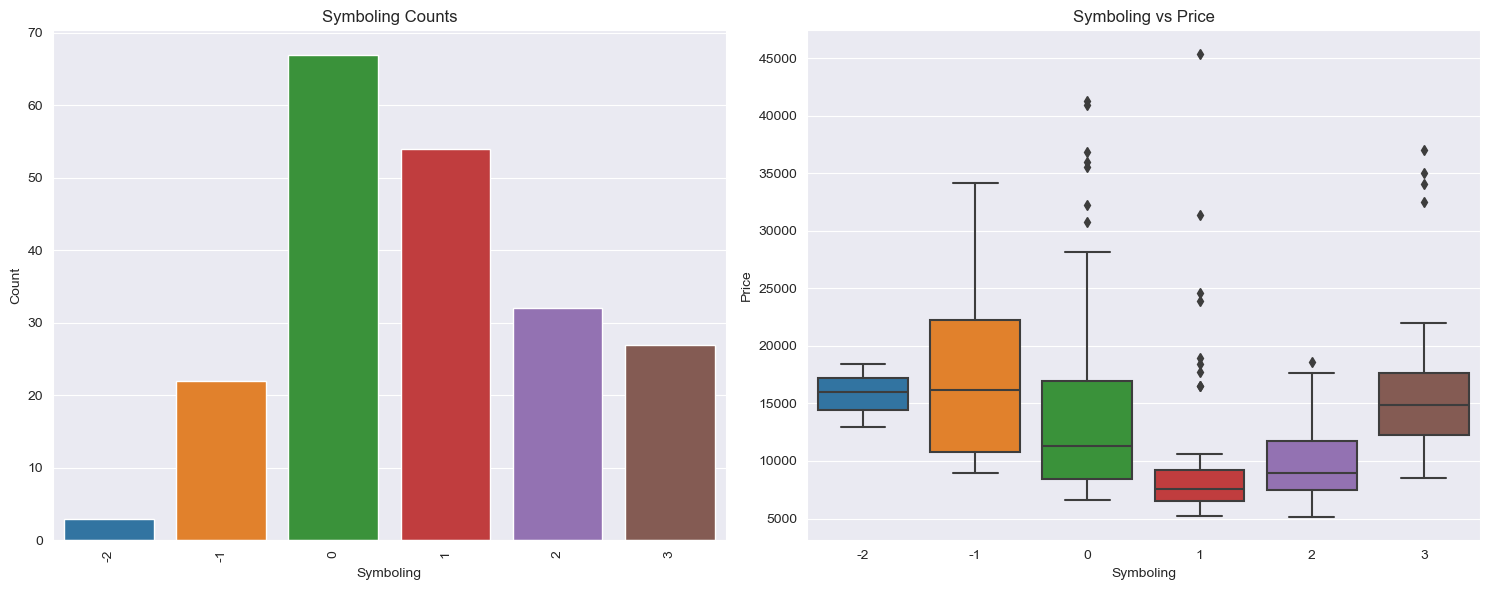

In [21]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot
sorted_symboling = cars_df['symboling'].value_counts().sort_index()
sns.barplot(x=sorted_symboling.index, y=sorted_symboling.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Symboling')
axes[0].set_ylabel('Count')
axes[0].set_title('Symboling Counts')

# Plot 2: Boxplot
sns.boxplot(x=cars_df['symboling'], y=cars_df['price'], ax=axes[1])
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')
axes[1].set_title('Symboling vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

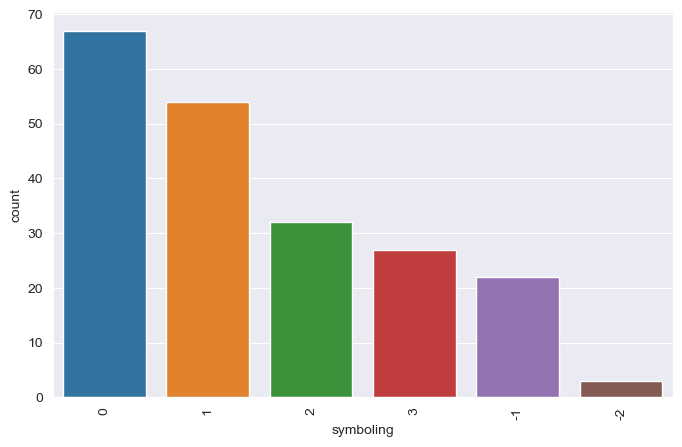

In [20]:
sns.countplot(x = cars_df['symboling'], data = cars_df, order = cars_df['symboling'].value_counts().index)
plt.xticks(rotation = 90)
plt.show

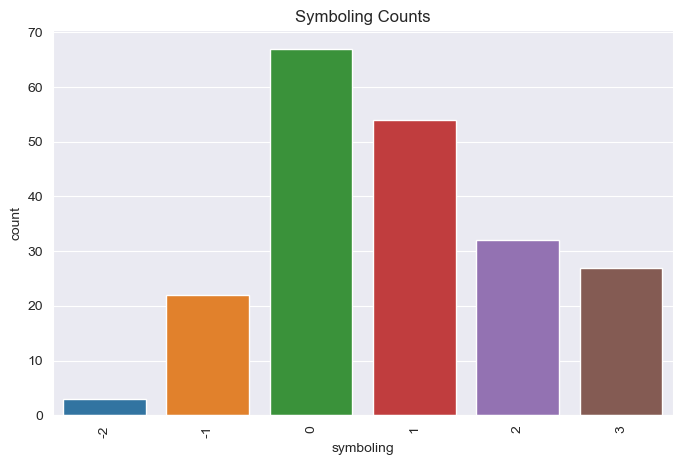

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_symboling = cars_df['symboling'].value_counts().sort_index()
sns.barplot(x=sorted_symboling.index, y=sorted_symboling.values)
plt.xticks(rotation=90)
plt.xlabel('symboling')
plt.ylabel('count')
plt.title('Symboling Counts')
plt.show()





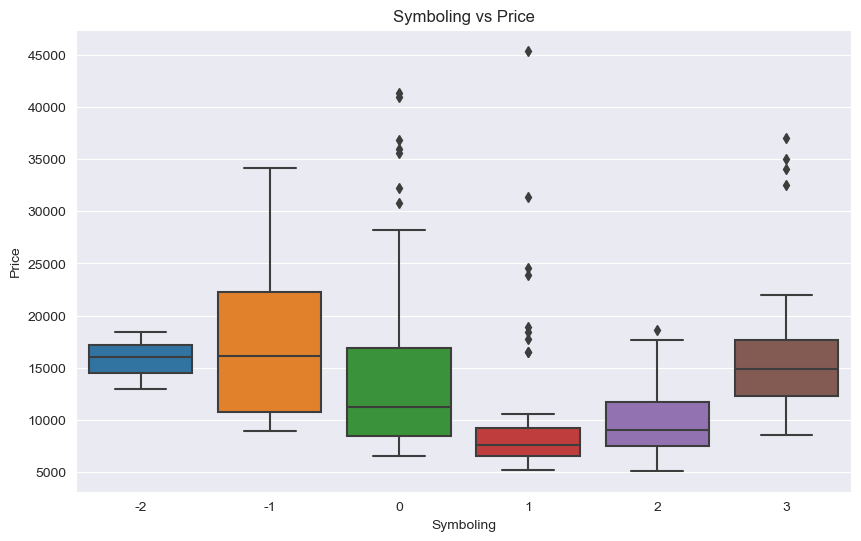

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cars_df['symboling'], y=cars_df['price'],)

# Adding labels and title
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.title('Symboling vs Price')

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
2. A box plot of enginetype on the x-axis and price on the y-axis.

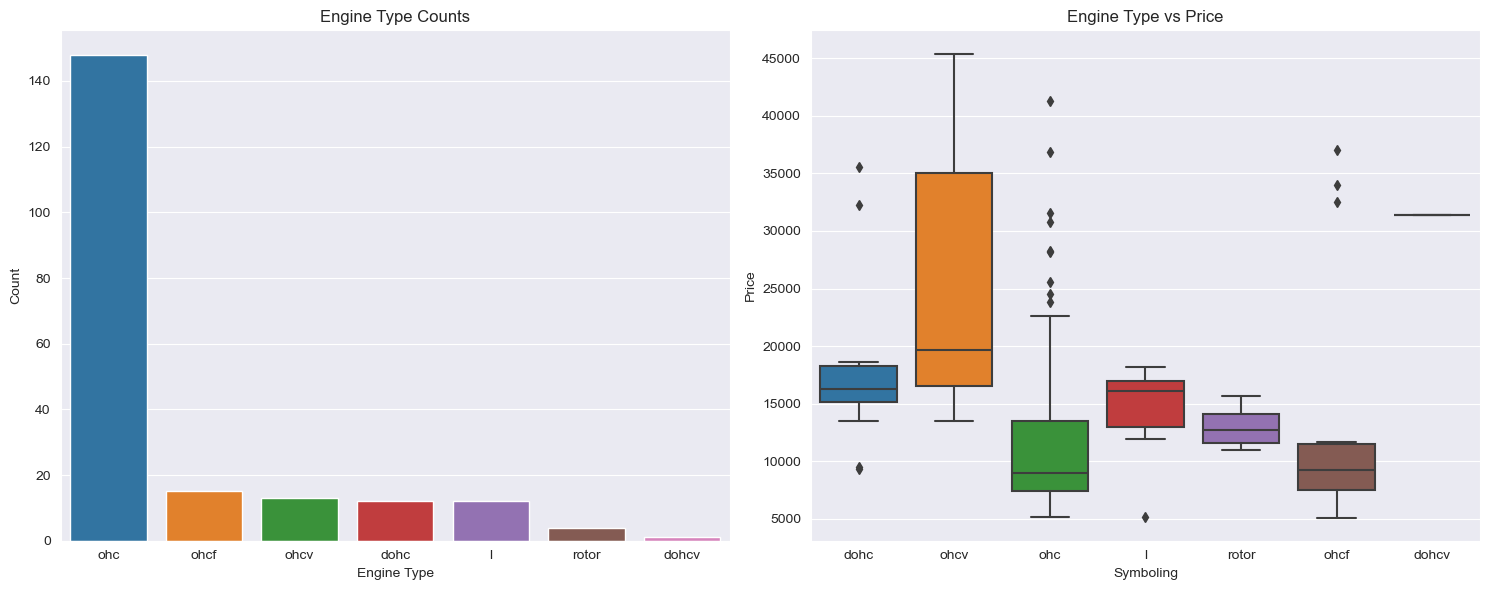

In [48]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot
# Plot 1: Barplot with sorted x-axis values
engine_type_counts = cars_df['enginetype'].value_counts()
engine_type_counts_sorted = engine_type_counts.sort_values(ascending=False)  # Sort by count
sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Engine Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Type Counts')

# Plot 2: Boxplot
sns.boxplot(x=cars_df['enginetype'], y=cars_df['price'], ax=axes[1])
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Type vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After creating these 2 plots, describe what we can conclude from them.

Create the following plots
1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
2. 
A box plot of cylindernumber on the x-axis and price on the y-axis.is.

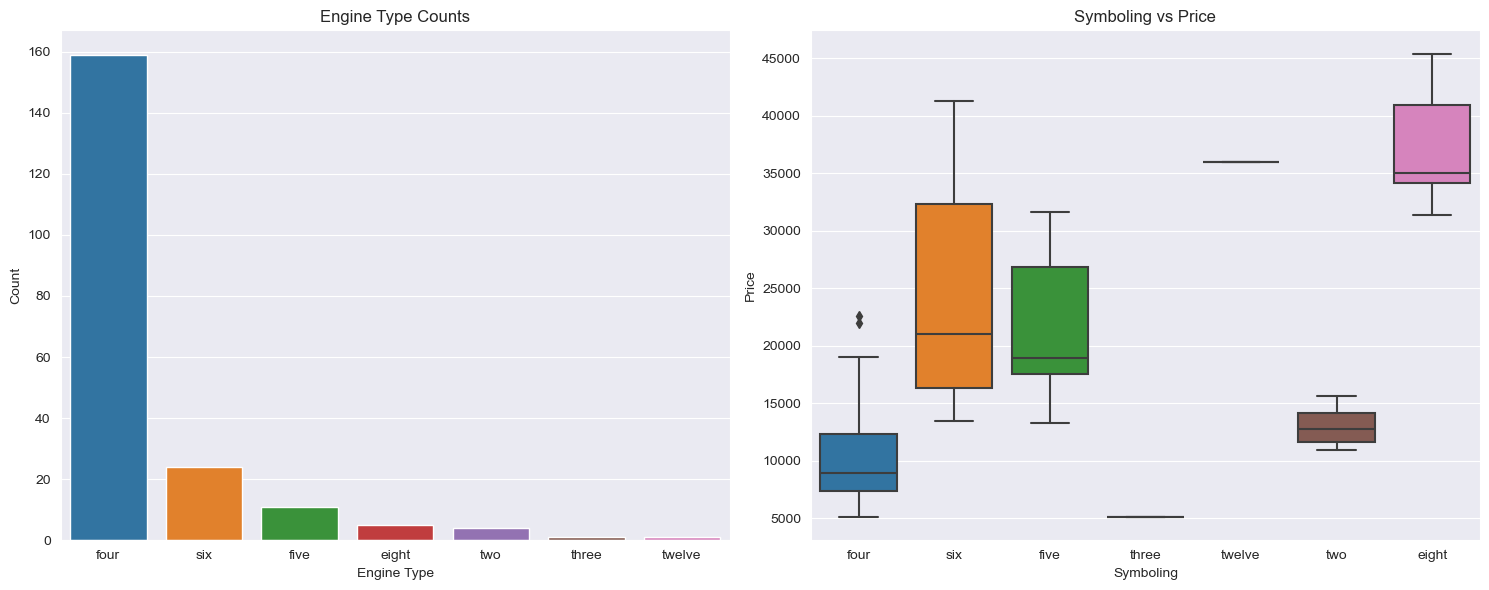

In [47]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot
# Plot 1: Barplot with sorted x-axis values
engine_type_counts = cars_df['cylindernumber'].value_counts()
engine_type_counts_sorted = engine_type_counts.sort_values(ascending=False)  # Sort by count
sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Engine Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Type Counts')

# Plot 2: Boxplot
sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], ax=axes[1])
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')
axes[1].set_title('Symboling vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

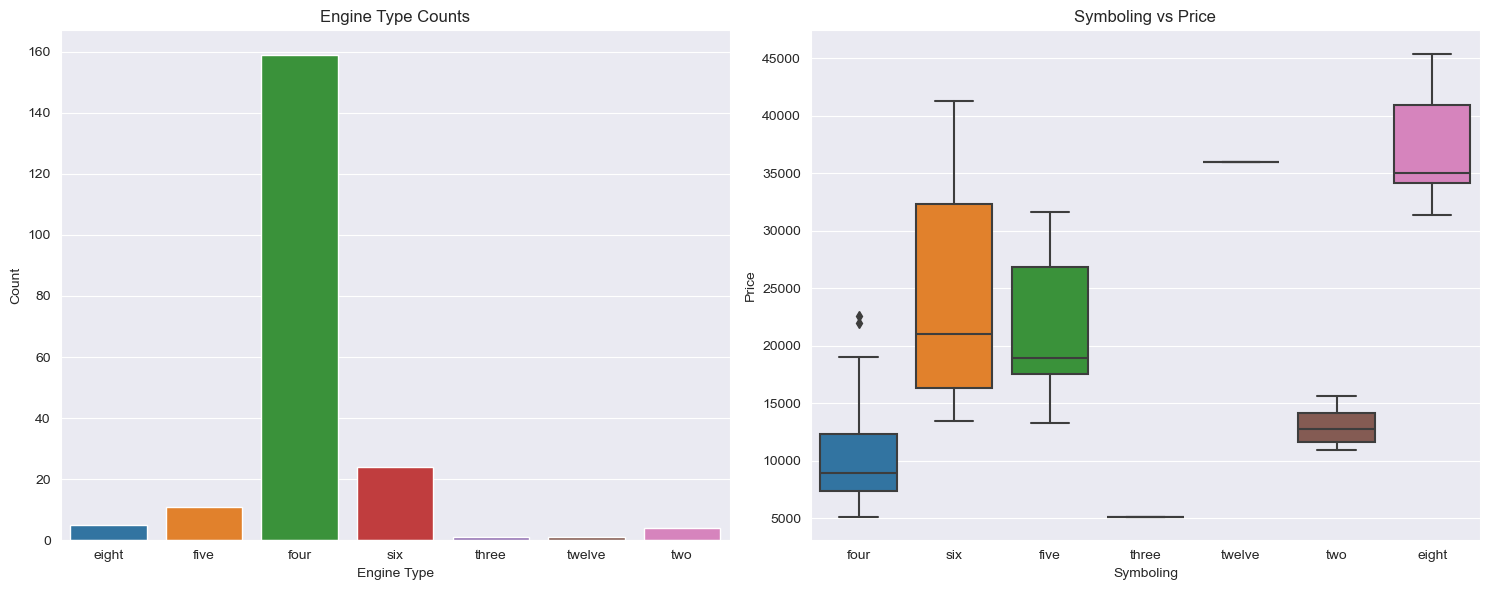

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot
# Plot 1: Barplot with sorted x-axis values
engine_type_counts = cars_df['cylindernumber'].value_counts()
engine_type_counts_sorted = engine_type_counts.sort_index()  # Sort by index (which represents the x-axis labels)
sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0])
axes[0].set_xticklabels(engine_type_counts_sorted.index, rotation=0)  # Set x-axis labels to match sorted order
axes[0].set_xlabel('Engine Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Type Counts')

# Plot 2: Boxplot
sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], ax=axes[1])
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')
axes[1].set_title('Symboling vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


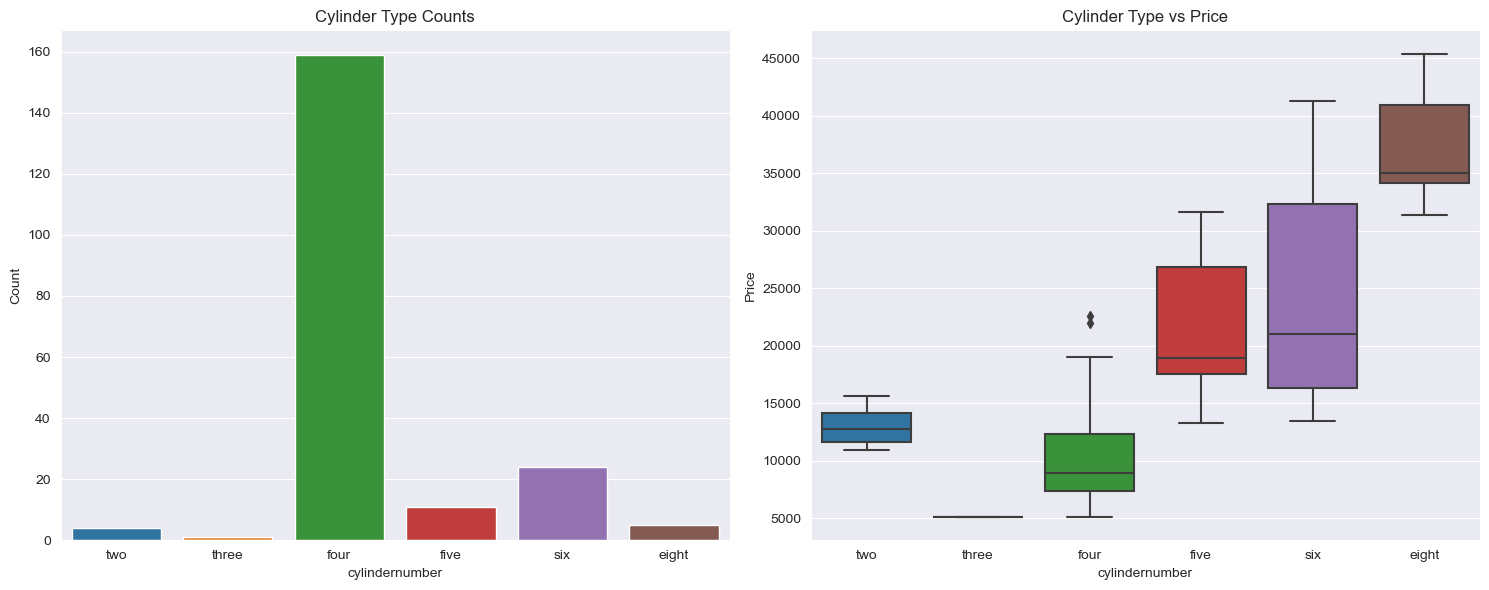

In [54]:

########################  THIS ONE!!!!!! 


import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping of x-axis labels to numerical values
label_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five':5, 
    'six':6, 
    'eight':8
}

# Sort the labels based on their numerical values
sorted_labels = sorted(label_mapping, key=label_mapping.get)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot
# Plot 1: Barplot with sorted x-axis values
engine_type_counts = cars_df['cylindernumber'].value_counts()
engine_type_counts_sorted = engine_type_counts.reindex(sorted_labels)  # Reindex based on sorted labels
sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('cylindernumber')
axes[0].set_ylabel('Count')
axes[0].set_title('Cylinder Type Counts')

# Plot 2: Boxplot
sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], order=sorted_labels, ax=axes[1])  # Use order parameter to specify the order of x-axis labels
axes[1].set_xlabel('cylindernumber')
axes[1].set_ylabel('Price')
axes[1].set_title('Cylinder Type vs Price')
 
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
2. A box plot of fuelsystem on the x-axis and price on the y-axis.

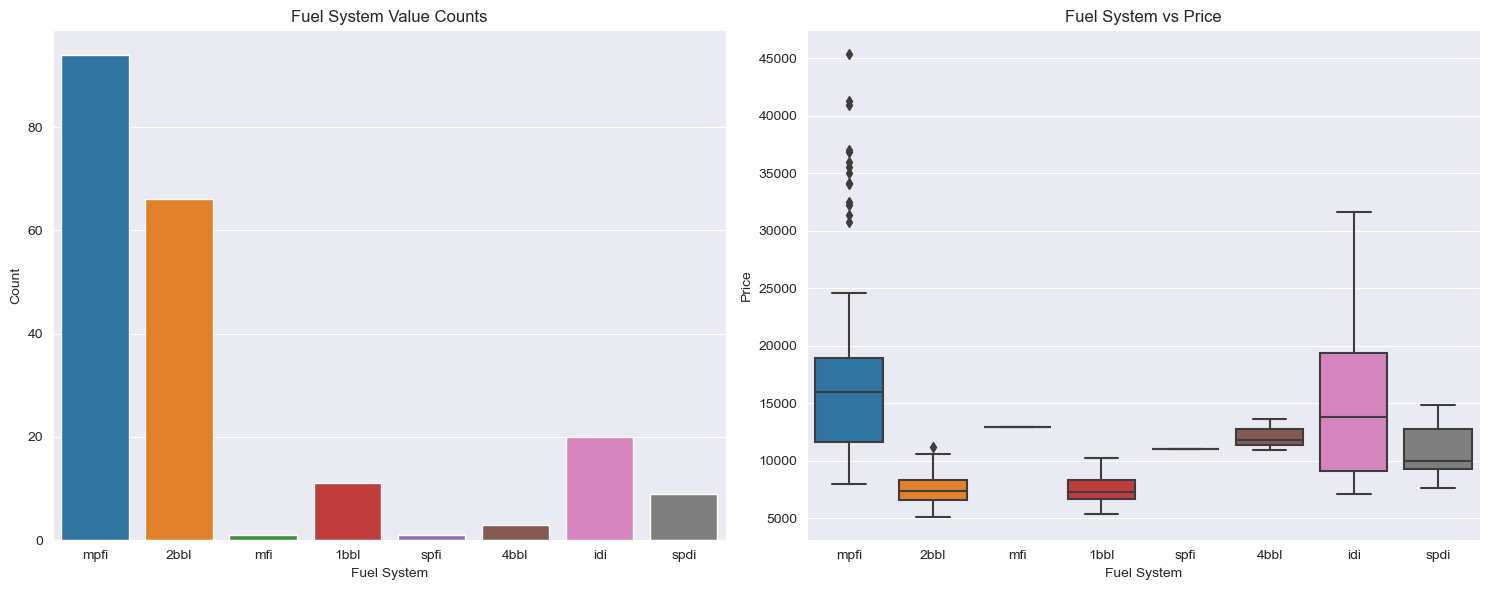

In [55]:
# company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
# sns.barplot(ax=axes[0], x=company_counts.index, y=company_counts.values, palette='rainbow')
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of fuelsystem value counts
sns.countplot(x='fuelsystem', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Fuel System')
axes[0].set_ylabel('Count')
axes[0].set_title('Fuel System Value Counts')

# Plot 2: Boxplot of fuelsystem vs price
sns.boxplot(x='fuelsystem', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Fuel System')
axes[1].set_ylabel('Price')
axes[1].set_title('Fuel System vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
2. A box plot of drivewheel on the x-axis and price on the y-axis.

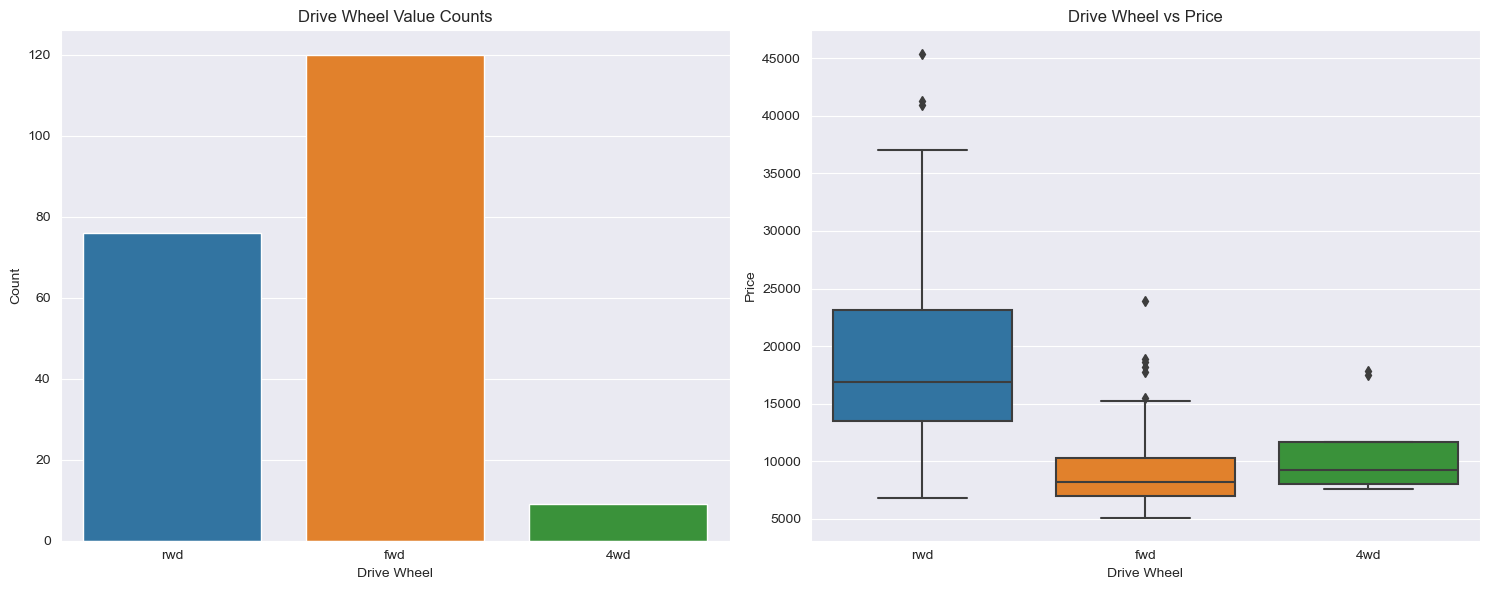

In [56]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of drivewheel value counts
sns.countplot(x='drivewheel', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Drive Wheel')
axes[0].set_ylabel('Count')
axes[0].set_title('Drive Wheel Value Counts')

# Plot 2: Boxplot of drivewheel vs price
sns.boxplot(x='drivewheel', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Drive Wheel')
axes[1].set_ylabel('Price')
axes[1].set_title('Drive Wheel vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
2. A box plot of enginelocation on the x-axis and price on the y-axis.

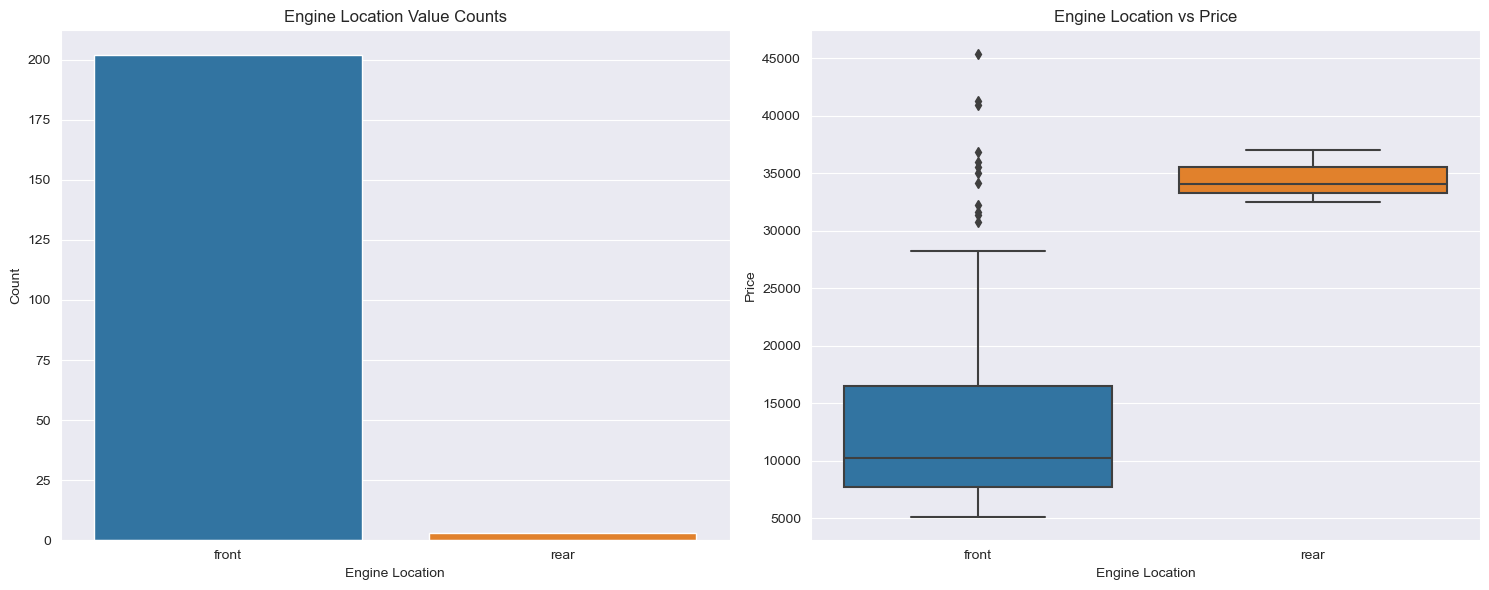

In [57]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of enginelocation value counts
sns.countplot(x='enginelocation', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Engine Location')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Location Value Counts')

# Plot 2: Boxplot of enginelocation vs price
sns.boxplot(x='enginelocation', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Engine Location')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Location vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
2. A box plot of fueltype on the x-axis and price on the y-axis.

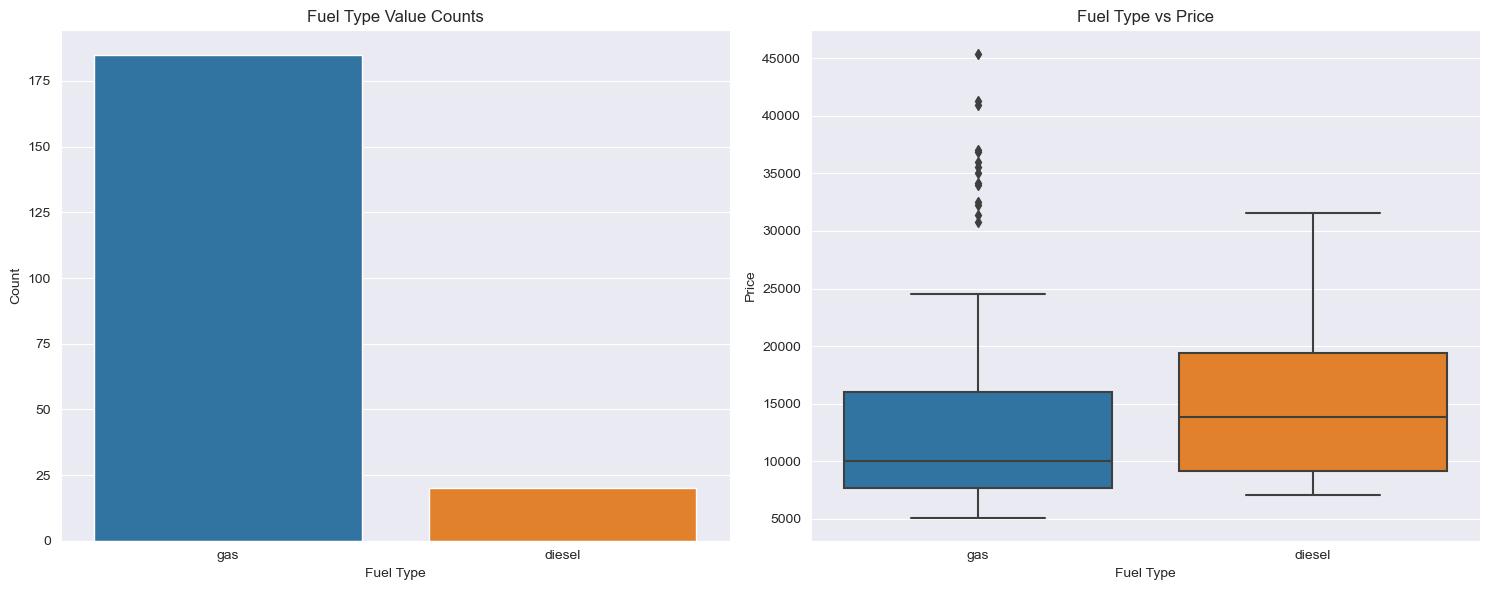

In [58]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of fueltype value counts
sns.countplot(x='fueltype', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Fuel Type Value Counts')

# Plot 2: Boxplot of fueltype vs price
sns.boxplot(x='fueltype', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')
axes[1].set_title('Fuel Type vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
2. A box plot of doornumber on the x-axis and price on the y-axis.

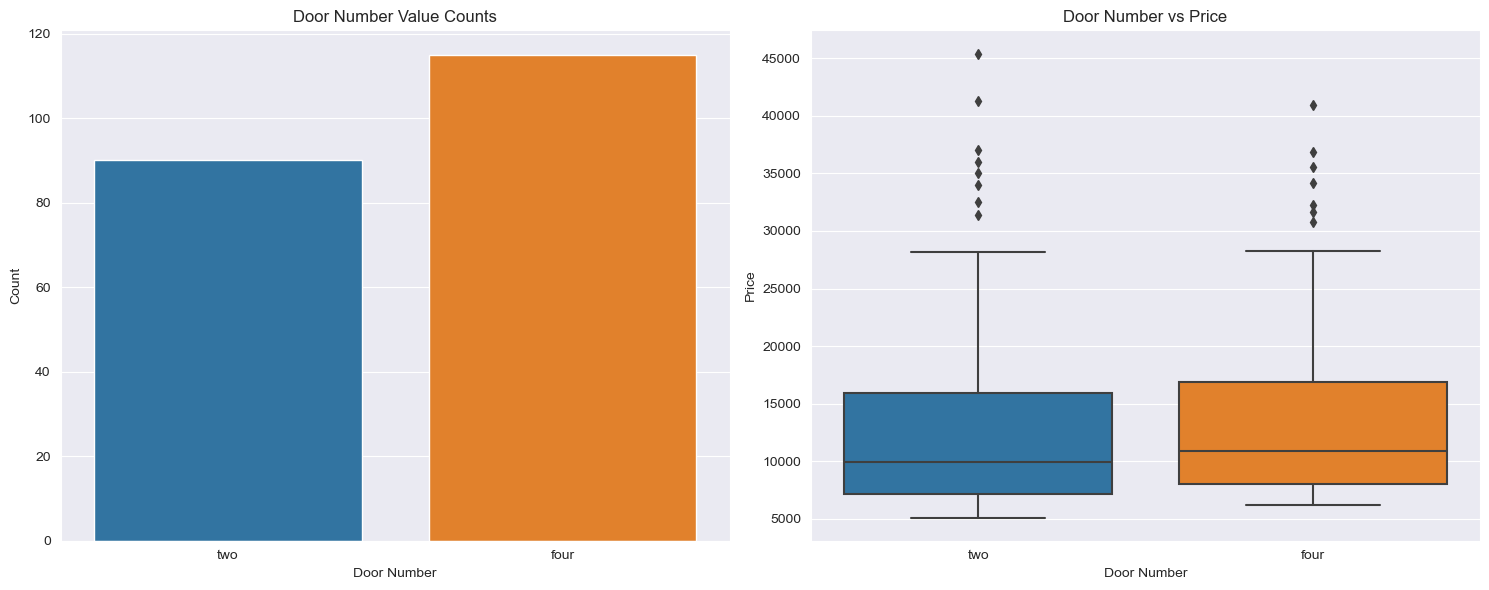

In [59]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of doornumber value counts
sns.countplot(x='doornumber', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Door Number')
axes[0].set_ylabel('Count')
axes[0].set_title('Door Number Value Counts')

# Plot 2: Boxplot of doornumber vs price
sns.boxplot(x='doornumber', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Door Number')
axes[1].set_ylabel('Price')
axes[1].set_title('Door Number vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
2. A box plot of aspiration on the x-axis and price on the y-axis.

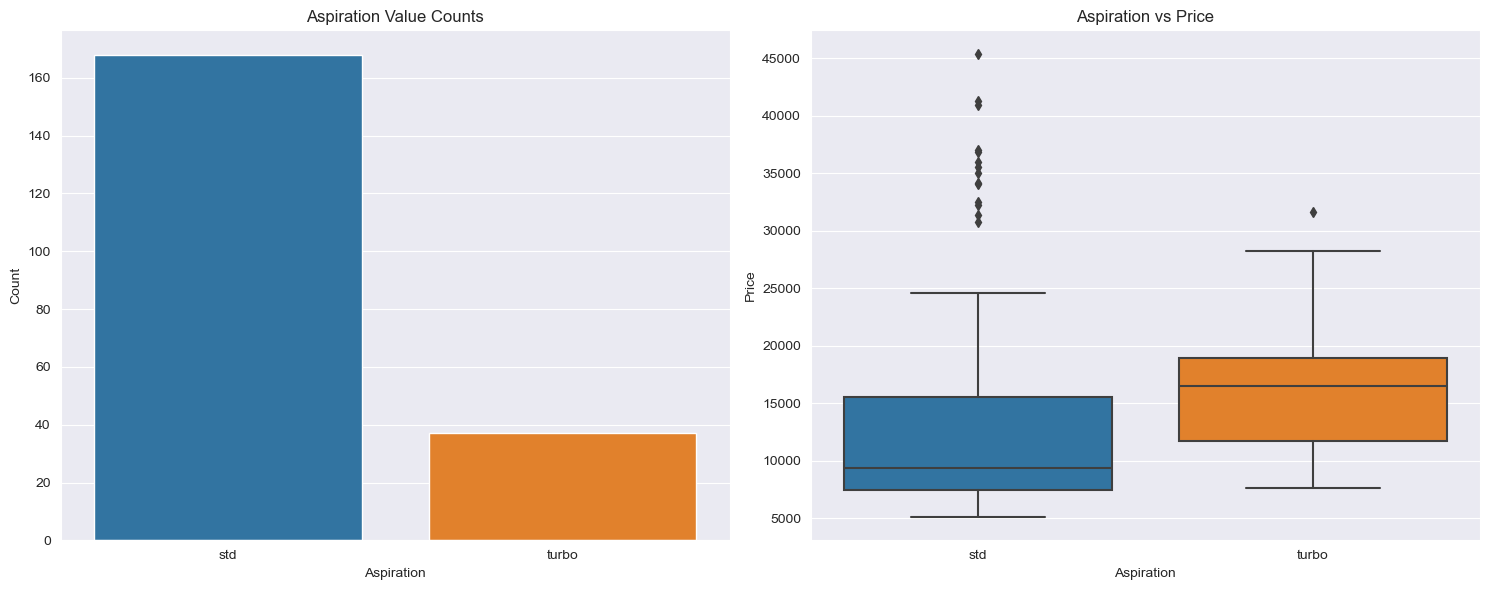

In [60]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of aspiration value counts
sns.countplot(x='aspiration', data=cars_df, ax=axes[0])
axes[0].set_xlabel('Aspiration')
axes[0].set_ylabel('Count')
axes[0].set_title('Aspiration Value Counts')

# Plot 2: Boxplot of aspiration vs price
sns.boxplot(x='aspiration', y='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Aspiration')
axes[1].set_ylabel('Price')
axes[1].set_title('Aspiration vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

## Part 4. Visualising Numerical Data

price
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
wheelbase
citympg
highwaympg

Create the following plots

1. A plot showing the price distribution
2. A box plot of price

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/4035422803.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=False)


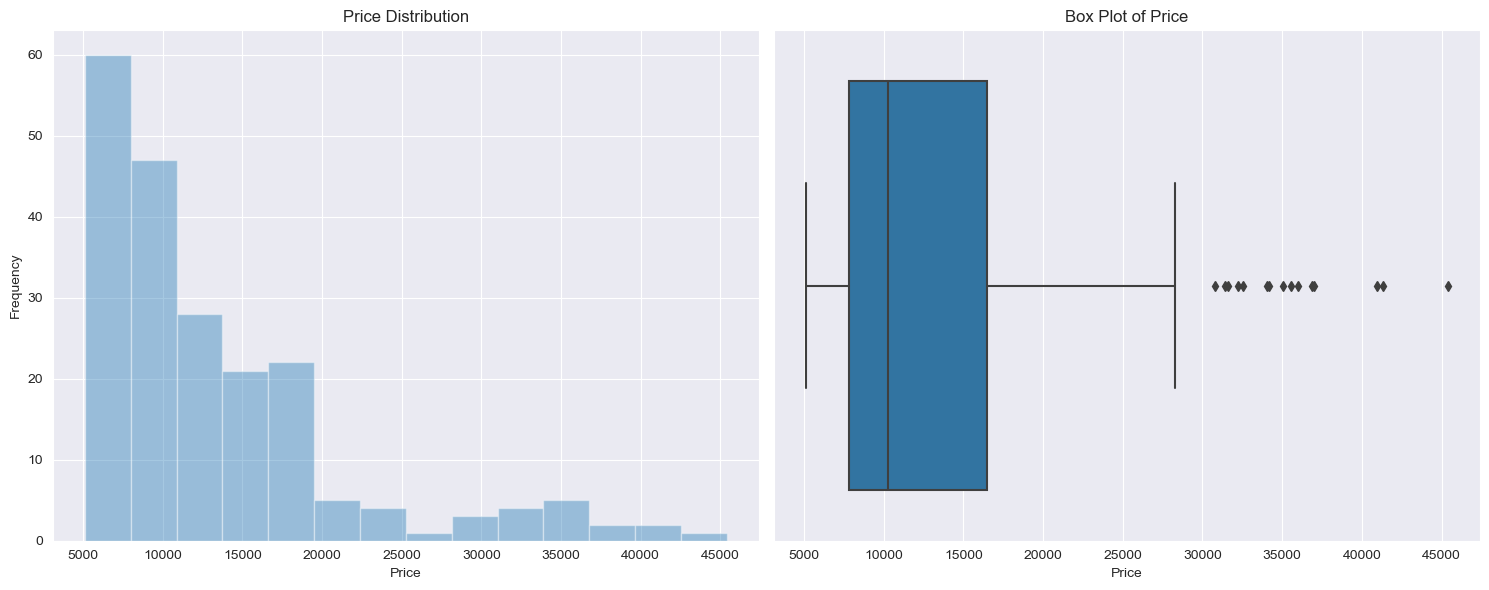

In [73]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=False)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/3790542047.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=False)


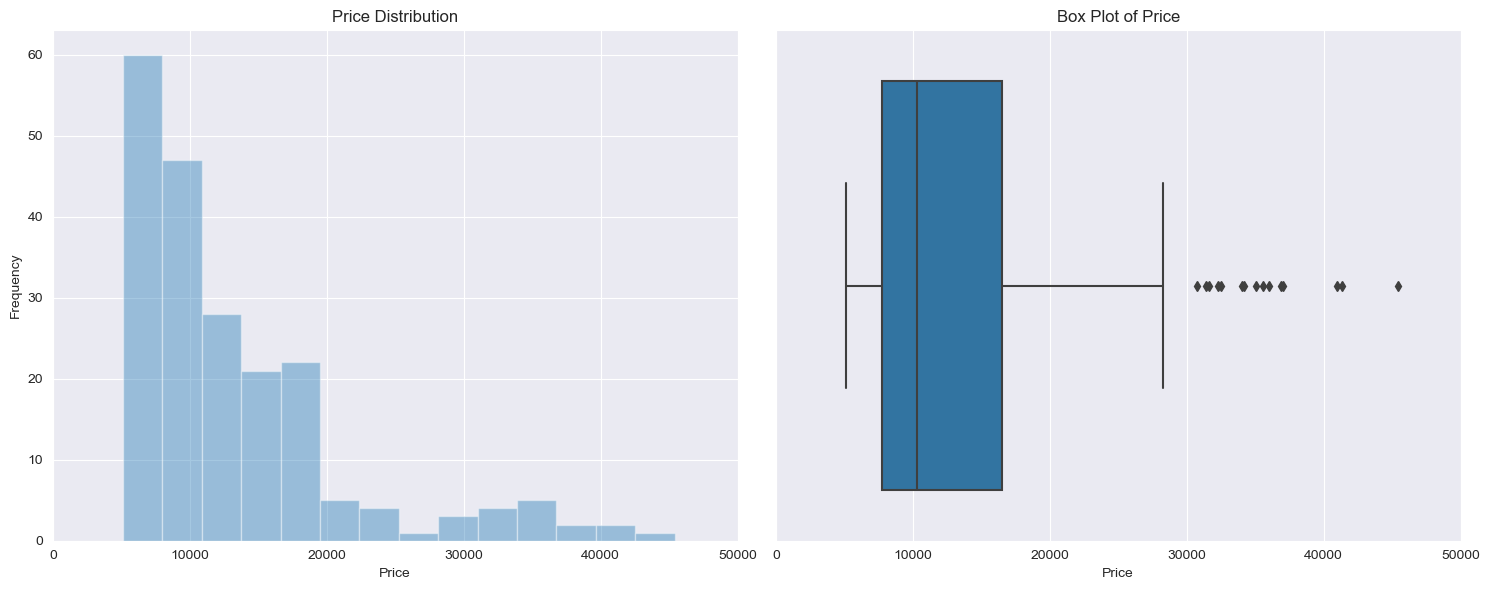

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=False)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
# plt.errorbar(x=company_stats_sorted['car_company'], y=company_stats_sorted['mean'], yerr=company_stats_sorted['std'], fmt='none', color='black', capsize=0, capthick=1)





# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')







# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


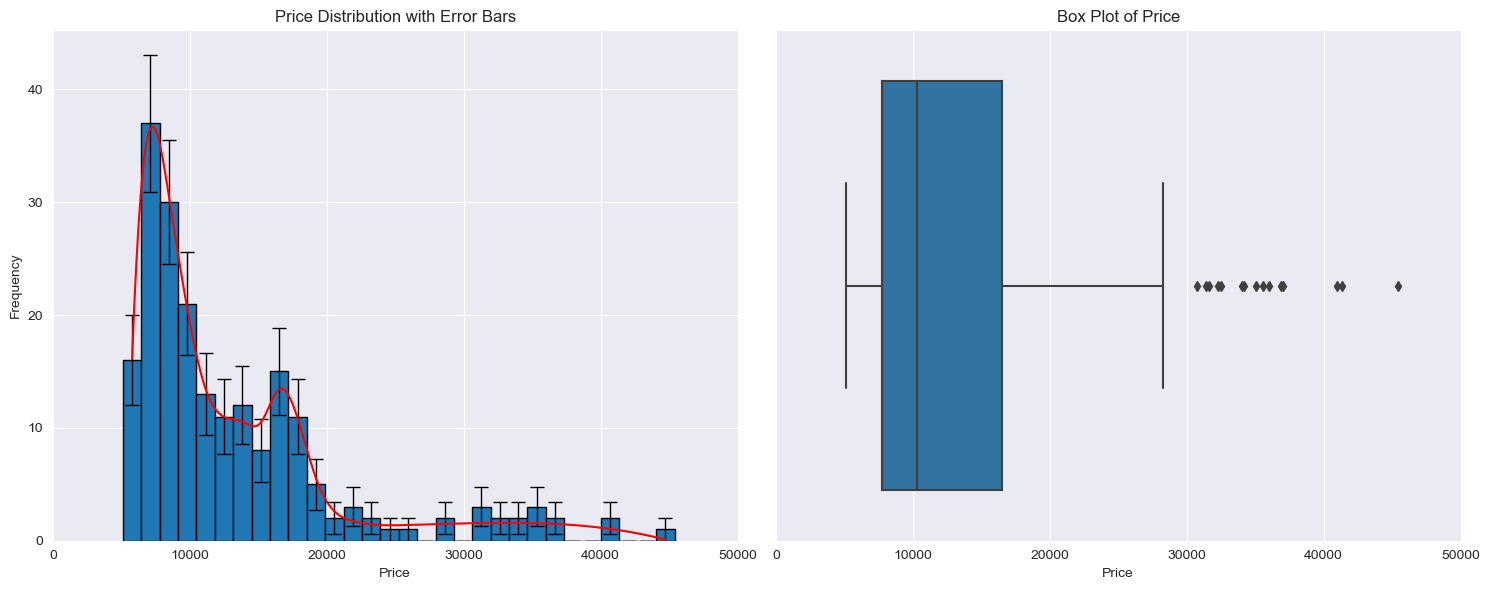

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import UnivariateSpline

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using histplot
counts, bins, patches = axes[0].hist(cars_df['price'], bins=30, edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# Simulated error bars: assuming a Poisson distribution for counts, standard deviation is sqrt(counts)
errors = np.sqrt(counts)

# Plot the histogram and error bars
axes[0].errorbar(bin_centers, counts, yerr=errors, fmt='none', ecolor='black', elinewidth=1, capsize=5)

# Fit a spline to the histogram counts
spline = UnivariateSpline(bin_centers, counts)
x_spline = np.linspace(bin_centers.min(), bin_centers.max(), 500)
y_spline = spline(x_spline)

# Plot the fitted spline curve
axes[0].plot(x_spline, y_spline, color='red', linestyle='-')

axes[0].set_xlim(0, 50000)
axes[0].set_xticks(range(0, 50001, 10000))
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution with Error Bars')

# Plot 2: Box plot of price
sns.boxplot(x=cars_df['price'], ax=axes[1])
axes[1].set_xlim(0, 50000)
axes[1].set_xticks(range(0, 50001, 10000))
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/417088074.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=False)


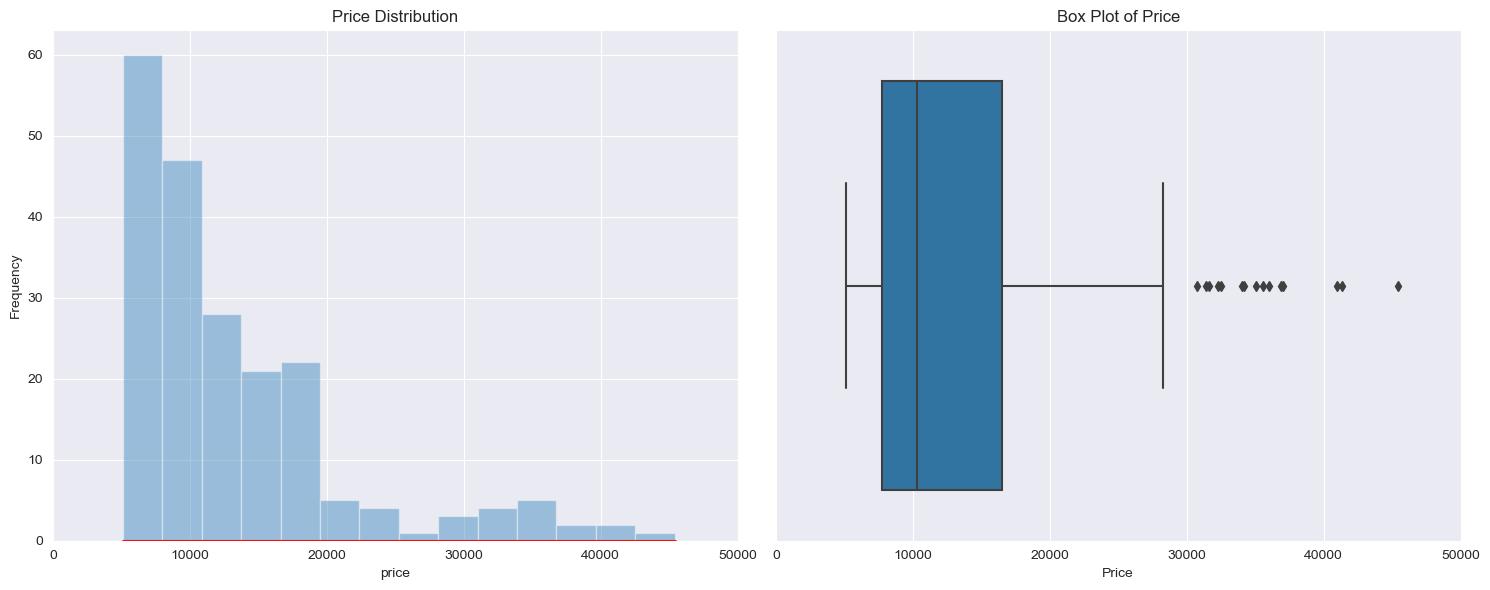

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=False)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Add regression line above the bars
sns.regplot(x=cars_df['price'], y=np.zeros_like(cars_df['price']), ax=axes[0], scatter=False, color='red')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


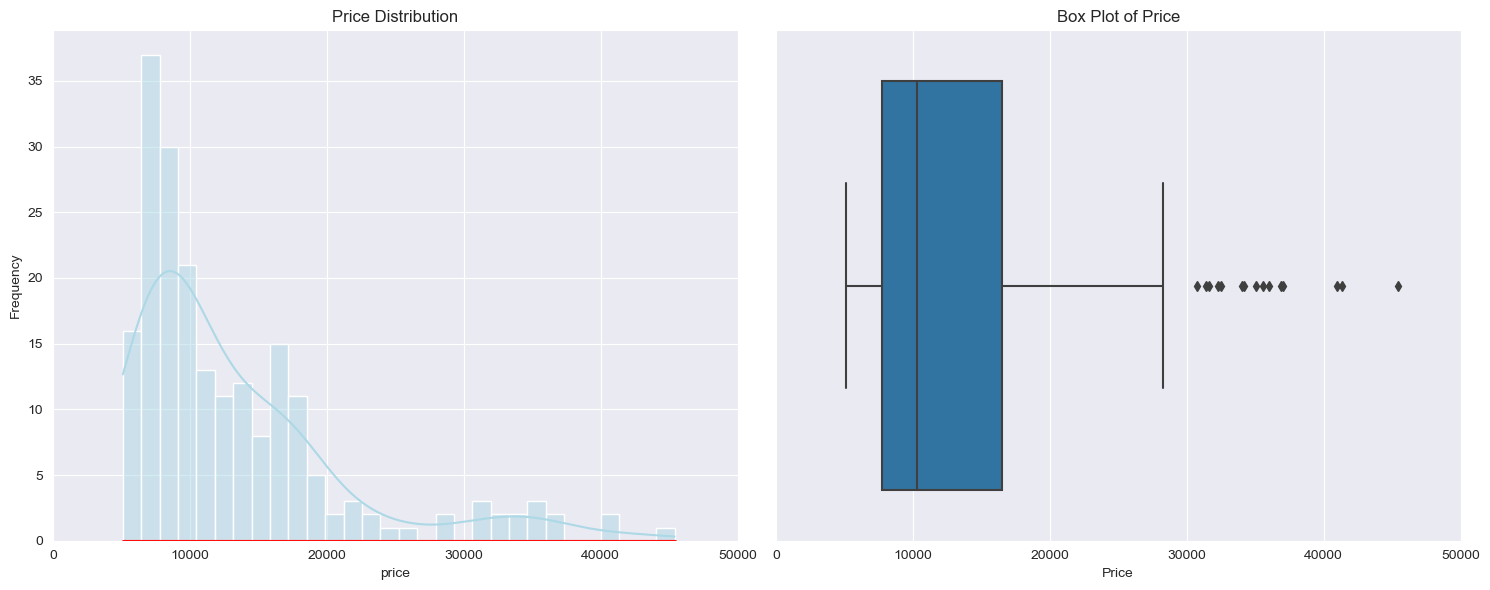

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using KDE plot and bars
sns.histplot(cars_df['price'], ax=axes[0], kde=True, color='lightblue', bins=30)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_ylim(0)  # Ensure y-axis starts from 0
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Add loess curve (regression line)
sns.regplot(x=cars_df['price'], y=np.zeros_like(cars_df['price']), ax=axes[0], scatter=False, lowess=True, line_kws={'color': 'red'})

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/1224569767.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=False)


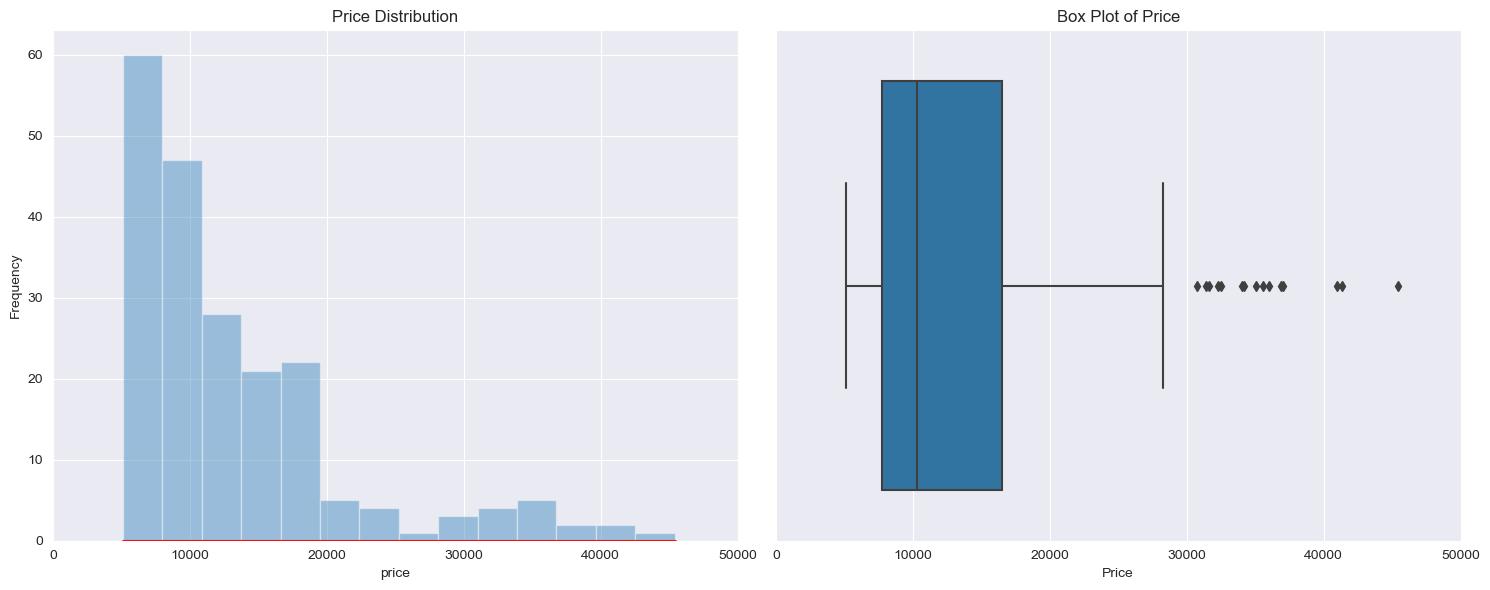

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using KDE plot and bars
# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=False)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Add loess curve (regression line)
sns.regplot(x=cars_df['price'], y=np.zeros_like(cars_df['price']), ax=axes[0], scatter=False, lowess=False, line_kws={'color': 'red'})

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/3790542047.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=False)


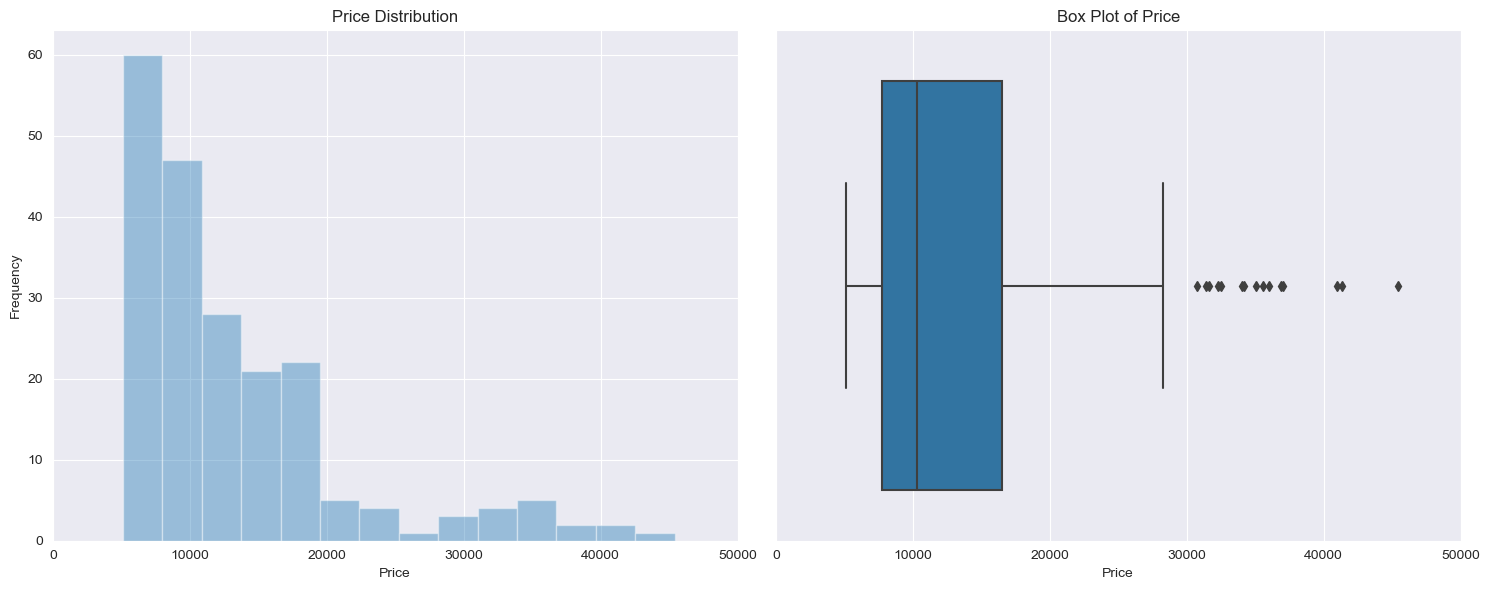

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=False)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
# plt.errorbar(x=company_stats_sorted['car_company'], y=company_stats_sorted['mean'], yerr=company_stats_sorted['std'], fmt='none', color='black', capsize=0, capthick=1)





# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')







# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9318/2435459536.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal_length'], bins=10, kde=True)
/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


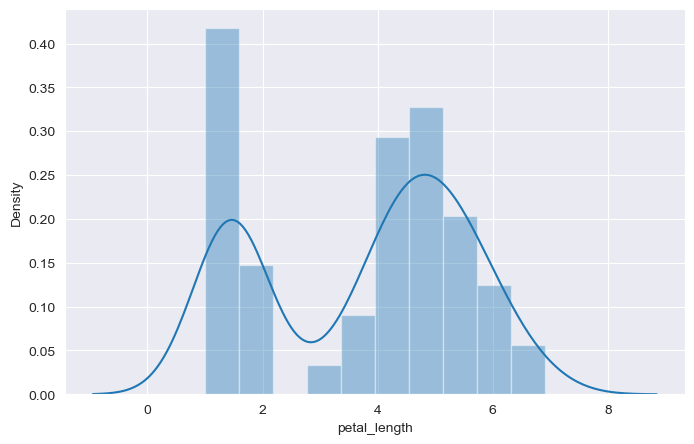

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data
data = sns.load_dataset('iris')

# Create a combined histogram and KDE plot
sns.distplot(data['petal_length'], bins=10, kde=True)

# Show the plot
plt.show()


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


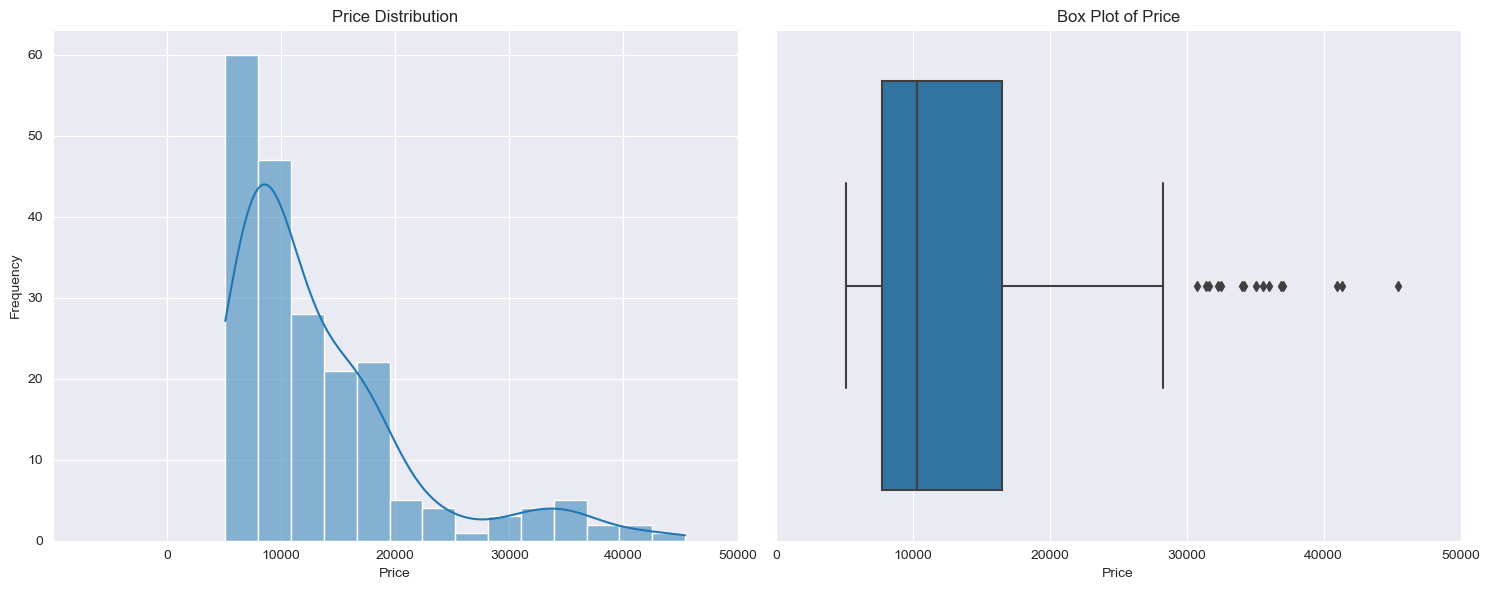

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using histplot and kdeplot
sns.histplot(cars_df['price'], ax=axes[0], kde=True, bins=14)
axes[0].set_xlim(-10000, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


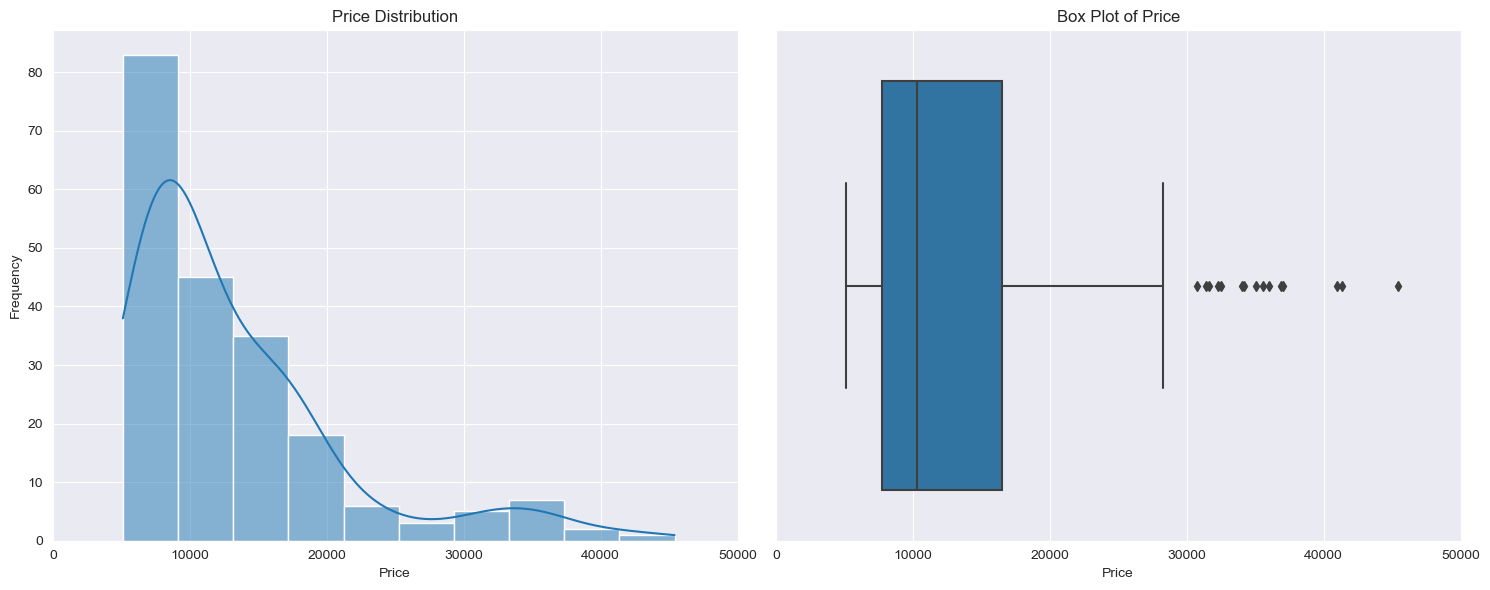

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using histplot and kdeplot
sns.histplot(cars_df['price'], ax=axes[0], kde=True, bins=10)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


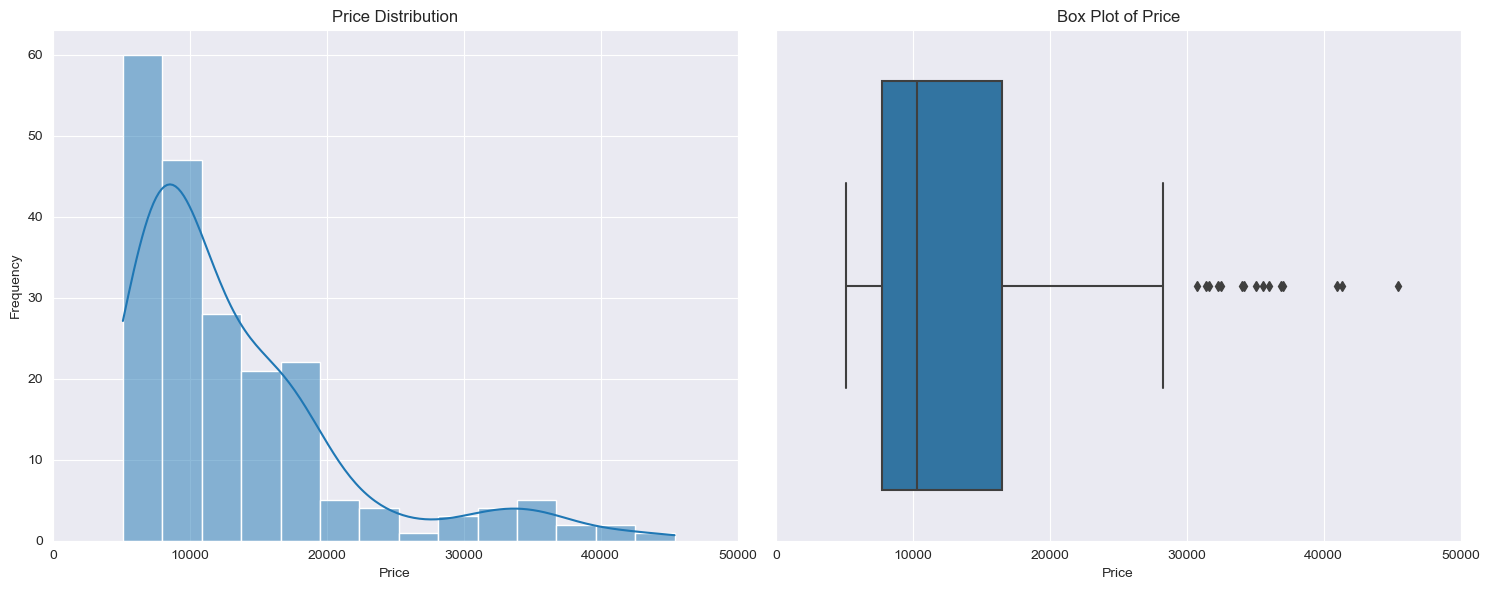

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using histplot and kdeplot
sns.histplot(cars_df['price'], ax=axes[0], kde=True, bins=14, common_norm=True)
axes[0].set_xlim(0, 50000)  # Set x-axis limits
axes[0].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlim(0, 50000)  # Set x-axis limits
axes[1].set_xticks(range(0, 50001, 10000))  # Set x-axis ticks at intervals of 10000
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Let's try and get an idea of how the car attributes related to a car's size are related to price.

Create the following plots

1. A scatter plot of carlength vs price.
2. A scatter plot of carwidth vs price.
3. A scatter plot of carheight vs price.
4. A scatter plot of carweight vs price.
 ce.rice.

ValueError: Could not interpret value `carweight` for parameter `x`

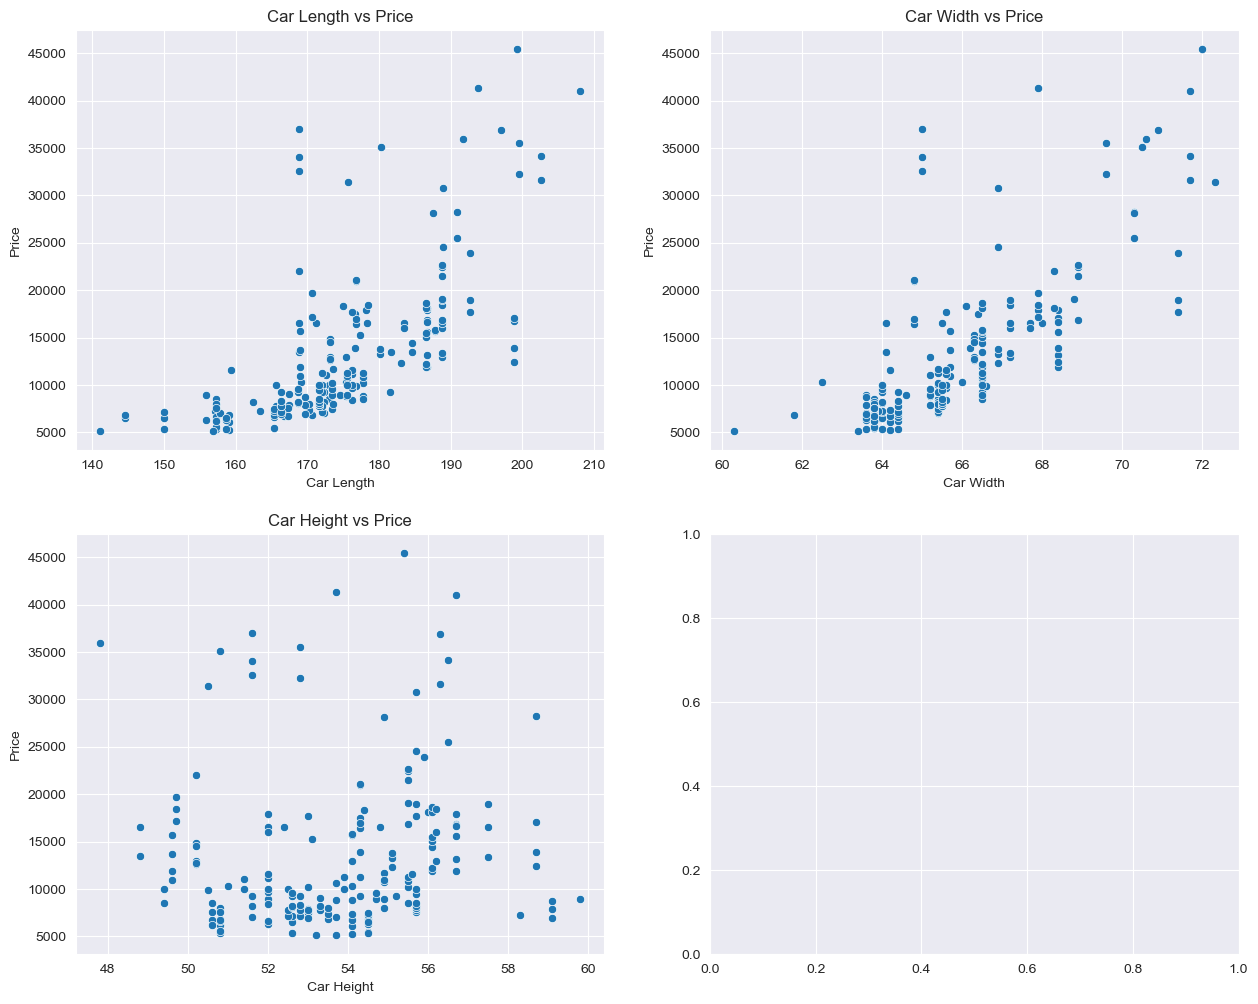

In [5]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of carlength vs price
sns.scatterplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Car Length vs Price')

# Plot 2: Scatter plot of carwidth vs price
sns.scatterplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Car Width vs Price')

# Plot 3: Scatter plot of carheight vs price
sns.scatterplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Car Height vs Price')

# Plot 4: Scatter plot of carweight vs price
sns.scatterplot(x='carweight', y='price', data=cars_df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Car Weight')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Car Weight vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


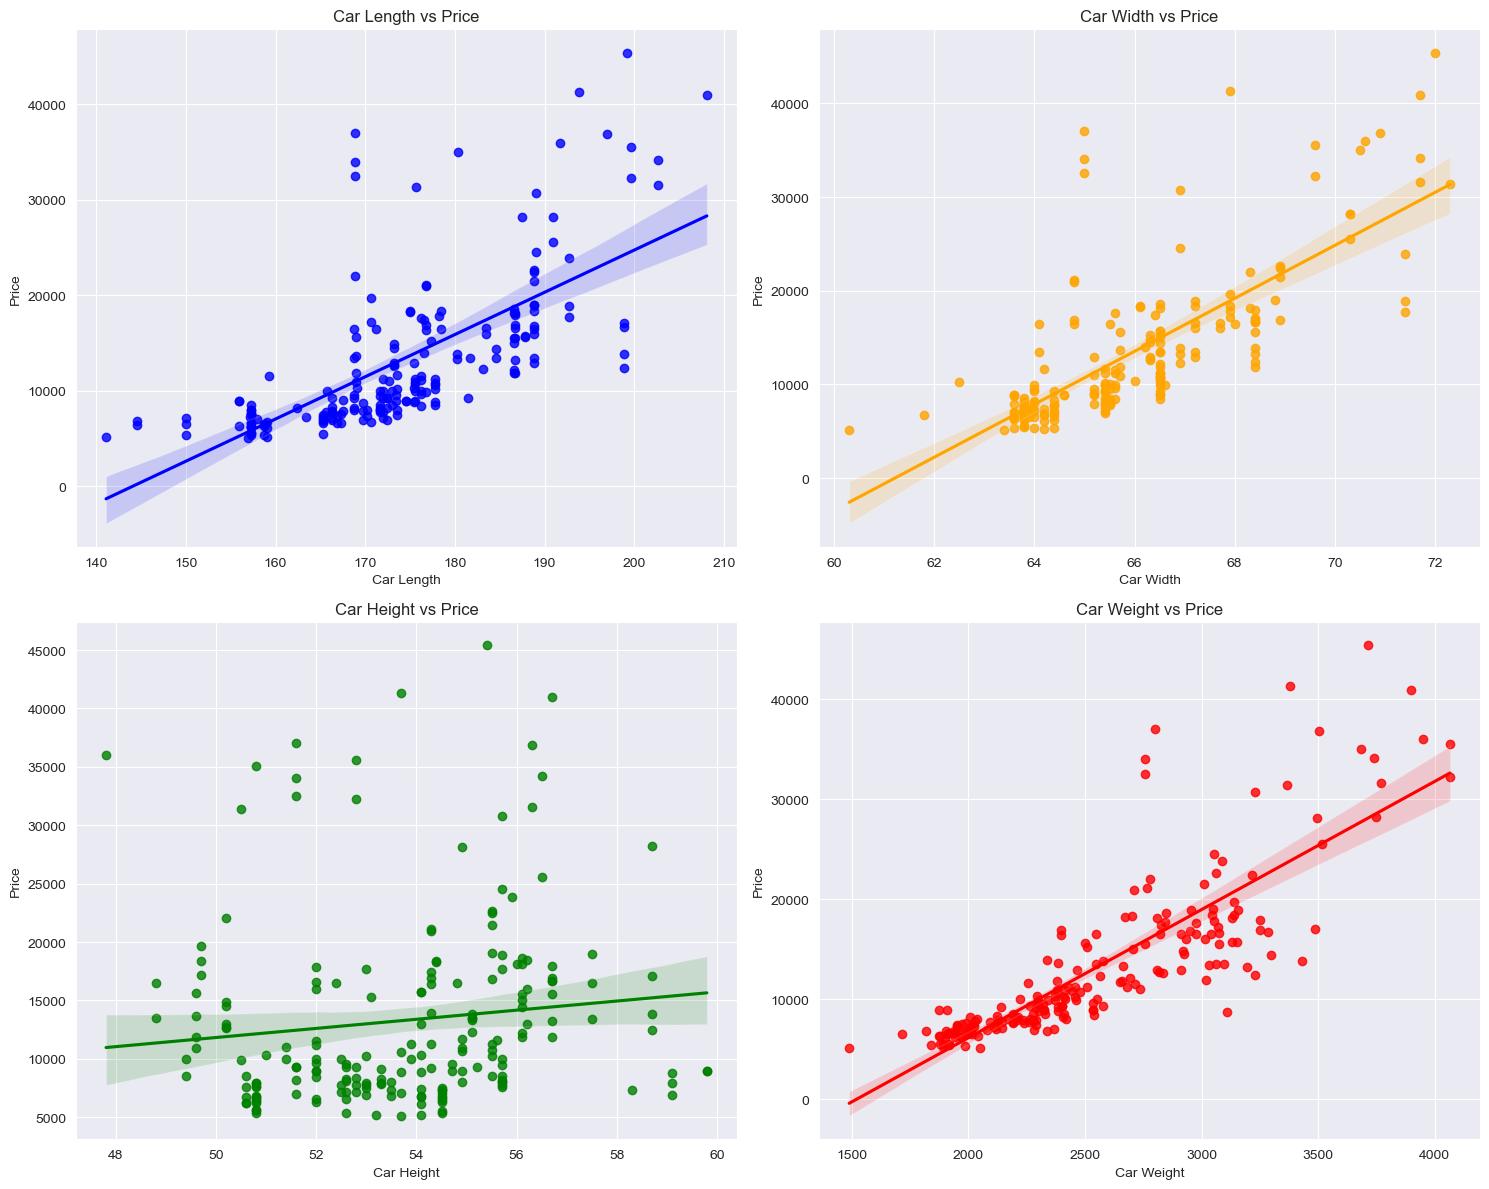

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of carlength vs price with regression line
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Car Length vs Price')

# Plot 2: Scatter plot of carwidth vs price with regression line
sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Car Width vs Price')

# Plot 3: Scatter plot of carheight vs price with regression line
sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Car Height vs Price')

# Plot 4: Scatter plot of carweight vs price with regression line
sns.regplot(x='curbweight', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
axes[1, 1].set_xlabel('Car Weight')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Car Weight vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'carweight'

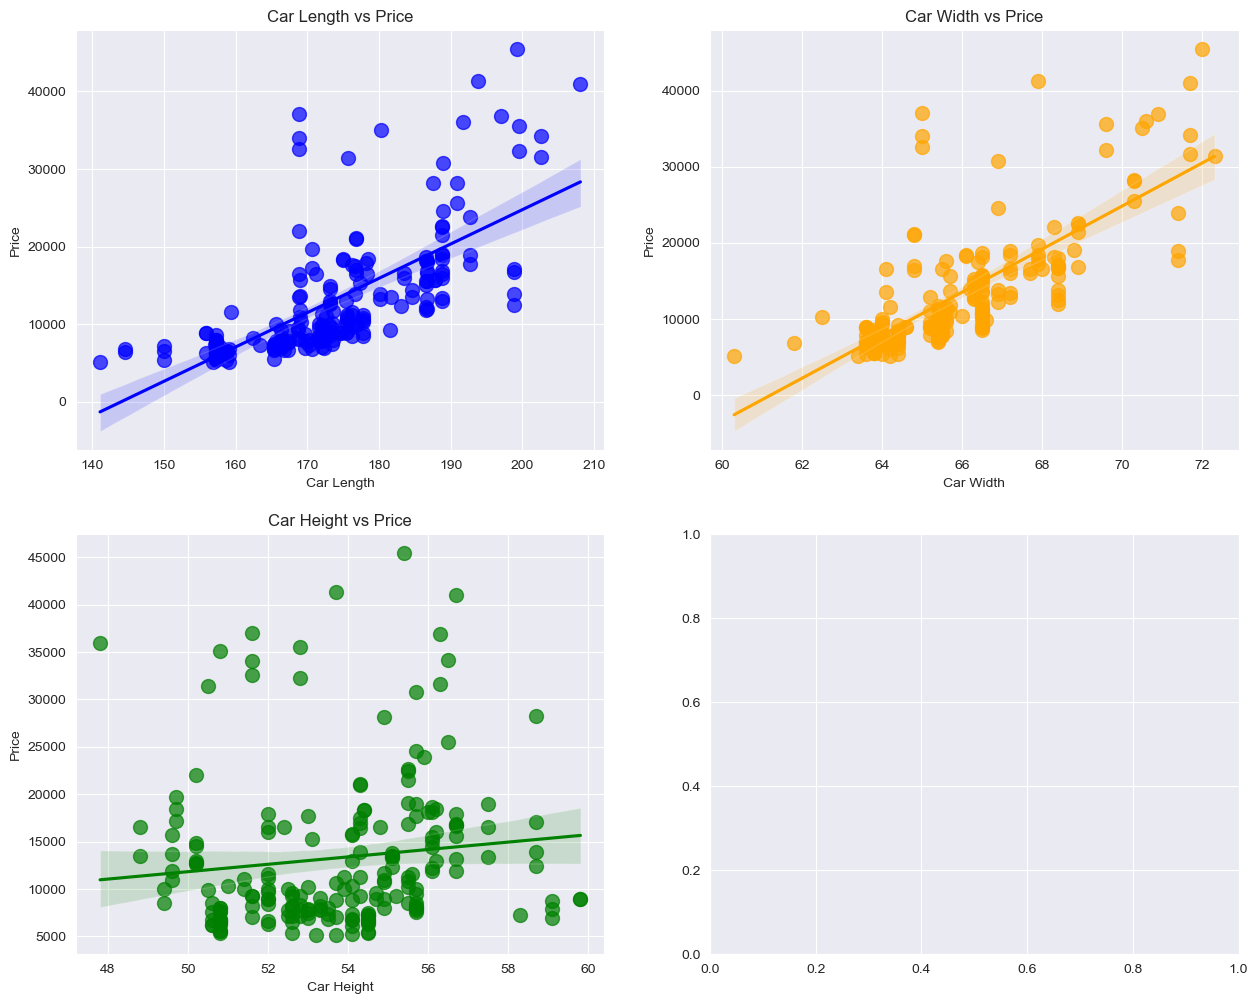

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of carlength vs price with regression line
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue', 's': 100, 'alpha': 0.7}, line_kws={'color': 'blue'})
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Car Length vs Price')

# Plot 2: Scatter plot of carwidth vs price with regression line
sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'orange', 's': 100, 'alpha': 0.7}, line_kws={'color': 'orange'})
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Car Width vs Price')

# Plot 3: Scatter plot of carheight vs price with regression line
sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'green', 's': 100, 'alpha': 0.7}, line_kws={'color': 'green'})
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Car Height vs Price')

# Plot 4: Scatter plot of carweight vs price with regression line
sns.regplot(x='carweight', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'red', 's': 100, 'alpha': 0.7}, line_kws={'color': 'red'})
axes[1, 1].set_xlabel('Car Weight')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Car Weight vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'carweight'

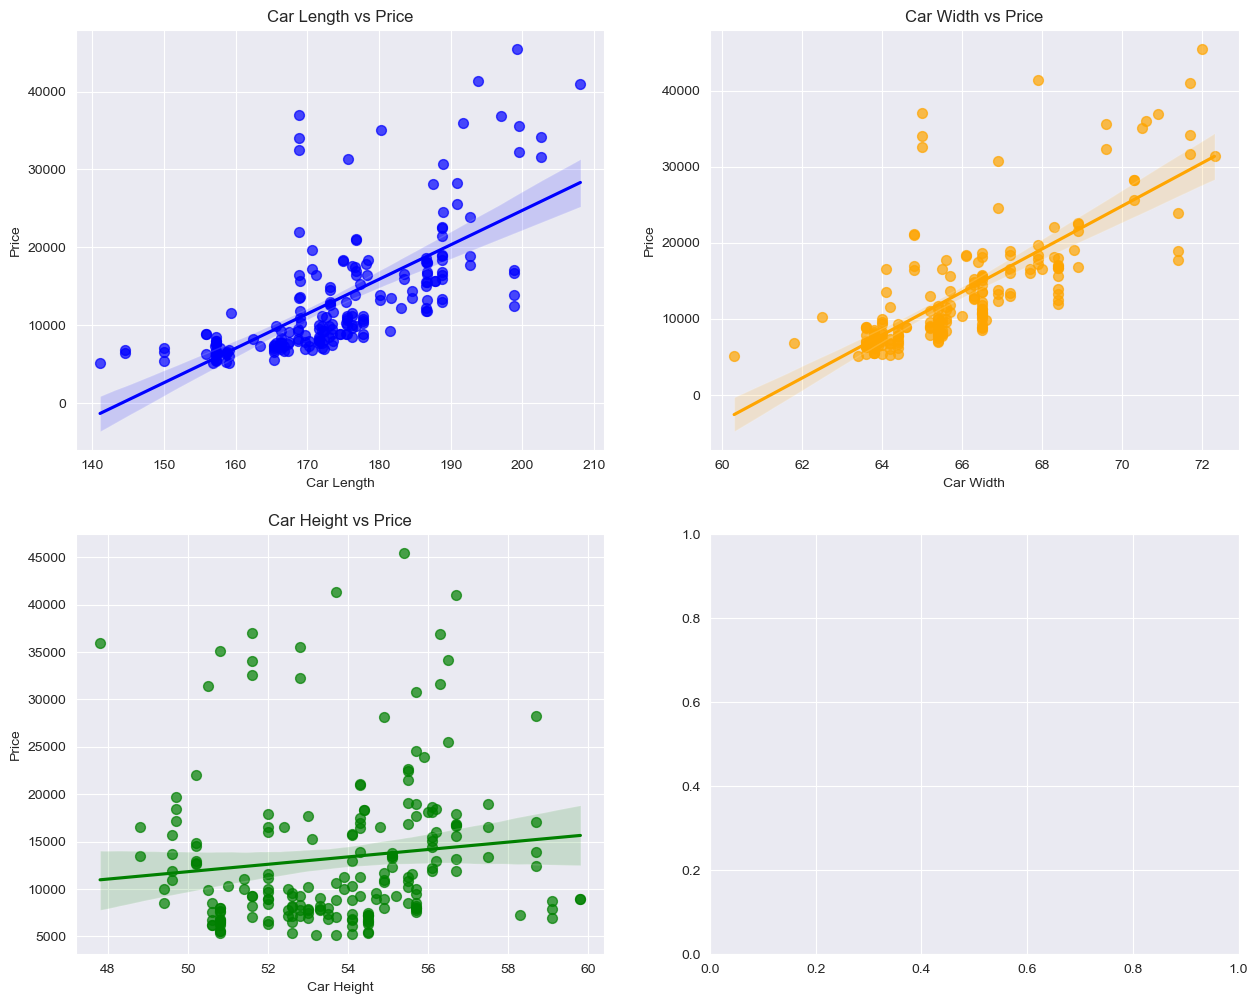

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of carlength vs price with regression line
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue', 's': 50, 'alpha': 0.7}, line_kws={'color': 'blue'})
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Car Length vs Price')

# Plot 2: Scatter plot of carwidth vs price with regression line
sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'orange', 's': 50, 'alpha': 0.7}, line_kws={'color': 'orange'})
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Car Width vs Price')

# Plot 3: Scatter plot of carheight vs price with regression line
sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'green', 's': 50, 'alpha': 0.7}, line_kws={'color': 'green'})
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Car Height vs Price')

# Plot 4: Scatter plot of carweight vs price with regression line
sns.regplot(x='carweight', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'red', 's': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
axes[1, 1].set_xlabel('Car Weight')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Car Weight vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 4 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

1. A scatter plot of enginesize vs price.
2. A scatter plot of boreratio vs price.
3. A scatter plot of stroke vs price.
4. A scatter plot of compressionratio vs price.
5. A scatter plot of horsepower vs price.
6. A scatter plot of peakrpm vs price.
7. A scatter plot of wheelbase vs price.
8. A scatter plot of citympg vs price.
9. A scatter plot of highwaympg vs price.
pg vs price.

In [5]:
import pandas as pd

# Assuming `cars_df` is your DataFrame containing the relevant data

# Get data types of all columns
data_types = cars_df.dtypes

# Print the data types of all columns
print(data_types)

# Identify which columns have categorical data types
categorical_columns = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object
Categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [7]:
import pandas as pd

# Assuming `cars_df` is your DataFrame containing the relevant data

# Identify categorical columns
categorical_columns = cars_df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables into dummy variables
dummy_df = pd.get_dummies(cars_df, columns=categorical_columns)

# Print the first few rows of the DataFrame with dummy variables
# print(dummy_df.head())
dummy_df.head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [196]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plots above, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create a heatmap or correlation matrix to inspect the correlations in our dataset.

In [200]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### WRITE YOUR ANSWER HERE

For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.

In [204]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After visual analysis, which variables do you believe to be significant when predicting price, and why?

### WRITE YOUR ANSWER HERE

## Part 5. Data Pre-Processing

Perform the following

1. Convert your categorical variables into dummy variables
2. Scale the data using a scaler of your choice
3. Split your data into a training and testing set, with test size of 0.30


In [209]:
### WRITE YOUR CODE HERE ###

## Part 6. Model Creation and Evaluation

Perform the following using sklearn

1. Create a linear regression model, and train (fit) it on the training data.
2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
3. Create a scatter plot of the true price labels vs the predicted price value of your model.
4. Create a histogram of the residuals
5. Print the \( R^2 \) of your model
values.

Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values.

In [213]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

In [215]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

What do your coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### WRITE YOUR ANSWER HERE